In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets, models
from tqdm import tqdm
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from torch.cuda.amp import autocast, GradScaler
import logging
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from torcheval.metrics import MulticlassF1Score

# STRATEGY 1 : Use a pretrained student.

##### DATA SPLIT + TRAINING PRETRAINED TEACHER AND STUDENT

##### This code implements a deep learning training pipeline for CIFAR-10 image classification using PyTorch. It initializes two models: a ResNet50 (teacher) and a ResNet18 (student). It loads and processes the dataset, trains both models using cross-entropy loss, evaluates performance metrics (loss, accuracy, F1 score), and visualizes training results. The trained models are saved for future use. The design emphasizes modularity, scalability, and ease of evaluation through clearly defined classes and methods

Files already downloaded and verified
Files already downloaded and verified


C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. Yo

Epoch 1: Teacher Train F1: 0.5602, Val F1: 0.3364, Train Loss: 1.3050, Val Loss: 5.5172
Epoch 1: Student Train F1: 0.5711, Val F1: 0.5732, Train Loss: 1.2498, Val Loss: 1.1923


Epochs Progress:  20%|██        | 2/10 [00:32<02:08, 16.08s/it]

Epoch 2: Teacher Train F1: 0.8177, Val F1: 0.7895, Train Loss: 0.5358, Val Loss: 0.6781
Epoch 2: Student Train F1: 0.7952, Val F1: 0.7555, Train Loss: 0.5990, Val Loss: 0.7232


Epochs Progress:  30%|███       | 3/10 [00:48<01:51, 15.97s/it]

Epoch 3: Teacher Train F1: 0.9048, Val F1: 0.8152, Train Loss: 0.2834, Val Loss: 0.6027
Epoch 3: Student Train F1: 0.8788, Val F1: 0.7836, Train Loss: 0.3574, Val Loss: 0.6829


Epochs Progress:  40%|████      | 4/10 [01:03<01:35, 15.92s/it]

Epoch 4: Teacher Train F1: 0.9584, Val F1: 0.8195, Train Loss: 0.1338, Val Loss: 0.6720
Epoch 4: Student Train F1: 0.9379, Val F1: 0.7869, Train Loss: 0.1878, Val Loss: 0.7557


Epochs Progress:  50%|█████     | 5/10 [01:19<01:18, 15.77s/it]

Epoch 5: Teacher Train F1: 0.9684, Val F1: 0.8013, Train Loss: 0.0945, Val Loss: 0.8199
Epoch 5: Student Train F1: 0.9673, Val F1: 0.8001, Train Loss: 0.1000, Val Loss: 0.7992


Epochs Progress:  60%|██████    | 6/10 [01:34<01:02, 15.62s/it]

Epoch 6: Teacher Train F1: 0.9701, Val F1: 0.8009, Train Loss: 0.0898, Val Loss: 0.8460
Epoch 6: Student Train F1: 0.9768, Val F1: 0.7868, Train Loss: 0.0694, Val Loss: 0.9534


Epochs Progress:  70%|███████   | 7/10 [01:50<00:46, 15.49s/it]

Epoch 7: Teacher Train F1: 0.9742, Val F1: 0.8172, Train Loss: 0.0770, Val Loss: 0.7568
Epoch 7: Student Train F1: 0.9792, Val F1: 0.7995, Train Loss: 0.0609, Val Loss: 0.9471


Epochs Progress:  80%|████████  | 8/10 [02:05<00:30, 15.36s/it]

Epoch 8: Teacher Train F1: 0.9810, Val F1: 0.8070, Train Loss: 0.0559, Val Loss: 0.8810
Epoch 8: Student Train F1: 0.9795, Val F1: 0.7899, Train Loss: 0.0645, Val Loss: 1.0082


Epochs Progress:  90%|█████████ | 9/10 [02:20<00:15, 15.31s/it]

Epoch 9: Teacher Train F1: 0.9804, Val F1: 0.8199, Train Loss: 0.0587, Val Loss: 0.8139
Epoch 9: Student Train F1: 0.9787, Val F1: 0.7817, Train Loss: 0.0617, Val Loss: 1.0751


Epochs Progress: 100%|██████████| 10/10 [02:35<00:00, 15.54s/it]

Epoch 10: Teacher Train F1: 0.9834, Val F1: 0.8276, Train Loss: 0.0490, Val Loss: 0.7953
Epoch 10: Student Train F1: 0.9807, Val F1: 0.7933, Train Loss: 0.0586, Val Loss: 1.0192


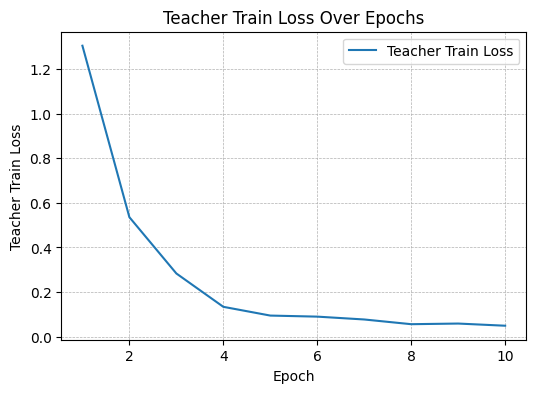

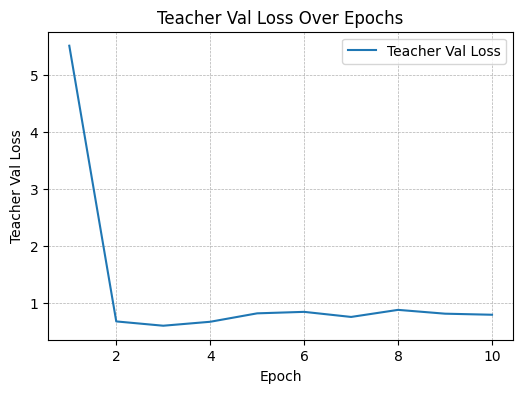

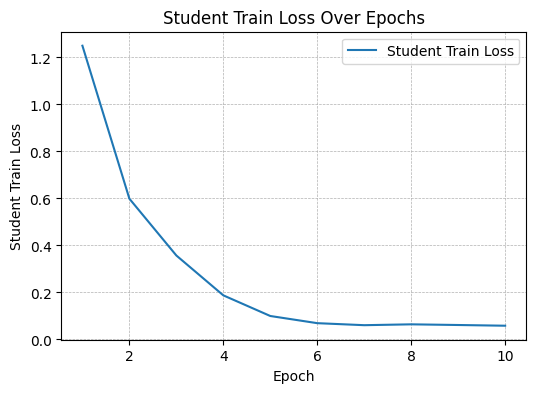

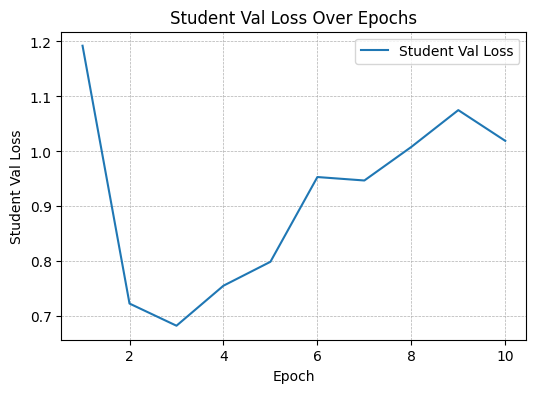

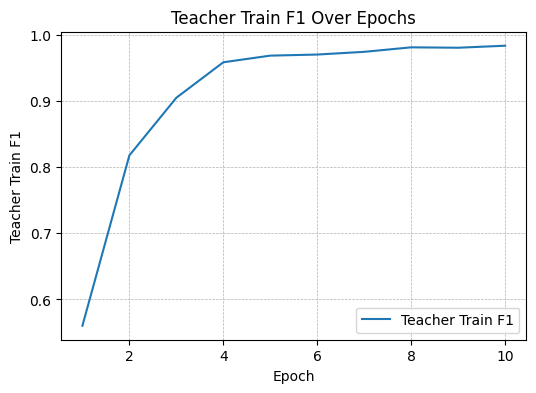

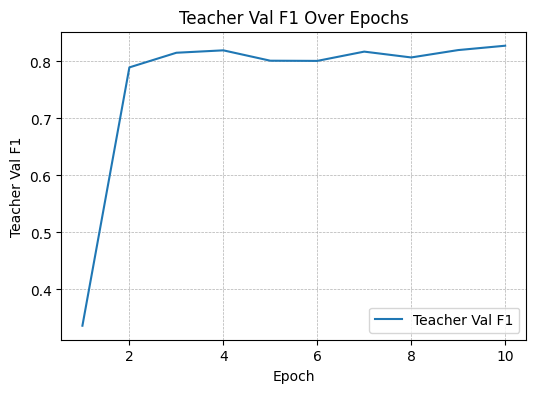

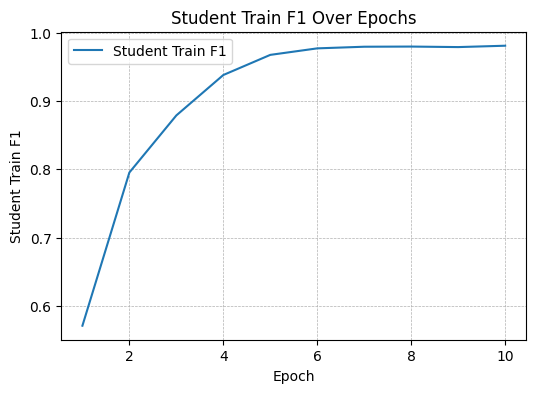

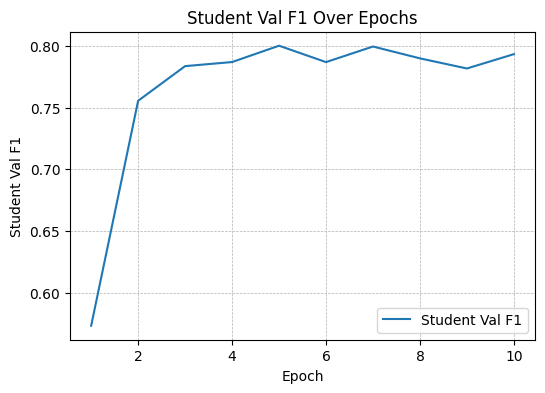

   Epoch  Teacher Train F1  Teacher Val F1  Student Train F1  Student Val F1  \
0      1          0.560209        0.336430          0.571074        0.573154   
1      2          0.817675        0.789549          0.795236        0.755514   
2      3          0.904764        0.815223          0.878758        0.783582   
3      4          0.958389        0.819460          0.937852        0.786895   
4      5          0.968429        0.801268          0.967309        0.800131   
5      6          0.970069        0.800944          0.976832        0.786849   
6      7          0.974165        0.817207          0.979227        0.799483   
7      8          0.980972        0.806980          0.979461        0.789887   
8      9          0.980364        0.819923          0.978701        0.781675   
9     10          0.983401        0.827555          0.980696        0.793311   

   Teacher Train Loss  Teacher Val Loss  Student Train Loss  Student Val Loss  
0            1.304980          5.517159

In [4]:


class ModelTrainer:
    def __init__(self, device='cuda'):
        self.device = torch.device('cuda' if torch.cuda.is_available() and device=='cuda' else 'cpu')
        self.configure_cuda()
        
    @staticmethod
    def configure_cuda():
        os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
        torch.cuda.empty_cache()

    def create_models(self):
        teacher_model = models.resnet50(pretrained=True)
        teacher_model.fc = nn.Linear(2048, 10)
        
        student_model = models.resnet18(pretrained=True)
        student_model.fc = nn.Linear(512, 10)
        
        return teacher_model.to(self.device), student_model.to(self.device)

class DataManager:
    def __init__(self, batch_size=2048):
        self.batch_size = batch_size
        self.transform = self.get_transform()
        
    @staticmethod
    def get_transform():
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    
    def load_data(self):
        train_full = datasets.CIFAR10(root='./data', train=True, download=True, transform=self.transform)
        test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=self.transform)
        
        total_train = len(train_full)
        train_size = int(0.60 * total_train)
        val_size = int(0.20 * total_train)
        test_size = total_train - train_size - val_size
        
        train_dataset, val_dataset, _ = random_split(train_full, [train_size, val_size, test_size])
        
        return {
            'train': DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True),
            'val': DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False),
            'test': DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)
        }

class Trainer:
    def __init__(self, model, criterion, optimizer, device):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        
    def train_epoch(self, train_loader):
        self.model.train()
        running_loss, correct, total = 0.0, 0, 0
        all_targets, all_predictions = [], []
        
        for inputs, targets in tqdm(train_loader, desc="Training", leave=False):
            inputs, targets = inputs.to(self.device), targets.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets)
            loss.backward()
            self.optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            
        metrics = {
            'loss': running_loss / len(train_loader.dataset),
            'accuracy': 100. * correct / total,
            'f1': f1_score(all_targets, all_predictions, average='weighted')
        }
        
        return metrics
    
    def evaluate(self, val_loader):
        self.model.eval()
        val_loss, correct, total = 0.0, 0, 0
        all_targets, all_predictions = [], []
        
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc="Validating", leave=False):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                all_targets.extend(targets.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                
        metrics = {
            'loss': val_loss / len(val_loader.dataset),
            'accuracy': 100. * correct / total,
            'f1': f1_score(all_targets, all_predictions, average='weighted')
        }
        
        return metrics

class ResultVisualizer:
    @staticmethod
    def plot_metrics(results, metrics):
        for metric in metrics:
            plt.figure(figsize=(6, 4))
            plt.plot(results['Epoch'], results[metric], label=metric)
            plt.title(f'{metric} Over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.legend()
            plt.show()

def main():
    model_trainer = ModelTrainer()
    data_manager = DataManager()
    dataloaders = data_manager.load_data()
    teacher_model, student_model = model_trainer.create_models()
    
    criterion = nn.CrossEntropyLoss()
    optimizer_teacher = optim.Adam(teacher_model.parameters(), lr=0.001)
    optimizer_student = optim.Adam(student_model.parameters(), lr=0.001)
    
    teacher_trainer = Trainer(teacher_model, criterion, optimizer_teacher, model_trainer.device)
    student_trainer = Trainer(student_model, criterion, optimizer_student, model_trainer.device)
    
    num_epochs = 10
    results = {
        'Epoch': [], 'Teacher Train F1': [], 'Teacher Val F1': [],
        'Student Train F1': [], 'Student Val F1': [],
        'Teacher Train Loss': [], 'Teacher Val Loss': [],
        'Student Train Loss': [], 'Student Val Loss': []
    }
    
    for epoch in tqdm(range(1, num_epochs + 1), desc="Epochs Progress"):
        teacher_train_metrics = teacher_trainer.train_epoch(dataloaders['train'])
        teacher_val_metrics = teacher_trainer.evaluate(dataloaders['val'])
        student_train_metrics = student_trainer.train_epoch(dataloaders['train'])
        student_val_metrics = student_trainer.evaluate(dataloaders['val'])
        
        results['Epoch'].append(epoch)
        results['Teacher Train F1'].append(teacher_train_metrics['f1'])
        results['Teacher Val F1'].append(teacher_val_metrics['f1'])
        results['Student Train F1'].append(student_train_metrics['f1'])
        results['Student Val F1'].append(student_val_metrics['f1'])
        results['Teacher Train Loss'].append(teacher_train_metrics['loss'])
        results['Teacher Val Loss'].append(teacher_val_metrics['loss'])
        results['Student Train Loss'].append(student_train_metrics['loss'])
        results['Student Val Loss'].append(student_val_metrics['loss'])
        
        print(f"Epoch {epoch}: Teacher Train F1: {teacher_train_metrics['f1']:.4f}, Val F1: {teacher_val_metrics['f1']:.4f}, Train Loss: {teacher_train_metrics['loss']:.4f}, Val Loss: {teacher_val_metrics['loss']:.4f}")
        print(f"Epoch {epoch}: Student Train F1: {student_train_metrics['f1']:.4f}, Val F1: {student_val_metrics['f1']:.4f}, Train Loss: {student_train_metrics['loss']:.4f}, Val Loss: {student_val_metrics['loss']:.4f}")
    
    results_df = pd.DataFrame(results)
    metrics_to_plot = ['Teacher Train Loss', 'Teacher Val Loss', 'Student Train Loss', 'Student Val Loss', 'Teacher Train F1', 'Teacher Val F1', 'Student Train F1', 'Student Val F1']
    visualizer = ResultVisualizer()
    visualizer.plot_metrics(results_df, metrics_to_plot)
    print(results_df)

    torch.save(teacher_model.state_dict(), 'teacher_model_strat1.pth')
    torch.save(student_model.state_dict(), 'student_model_strat1.pth')

if __name__ == "__main__":
    main()


#### Teacher Model:
Strong training performance (F1 ~98.63%) with improving validation F1 (~81.42%). Validation loss increases after Epoch 5, indicating overfitting.
#### Student Model:
High training F1 (~98.37%) but lower and stagnant validation F1 (~79%). Validation loss rises after Epoch 4, suggesting overfitting and weaker generalization compared to the teacher.
#### Key Issues: 
Both models overfit; the student struggles with validation performance despite effective training.

#### EVALUATION STRAT 1 Teacher + Student

Files already downloaded and verified
Files already downloaded and verified


C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. Yo


Teacher Model Classification Report:
              precision    recall  f1-score   support

    airplane       0.82      0.87      0.84      1000
  automobile       0.91      0.85      0.88      1000
        bird       0.81      0.75      0.78      1000
         cat       0.67      0.65      0.66      1000
        deer       0.76      0.86      0.80      1000
         dog       0.77      0.72      0.74      1000
        frog       0.86      0.88      0.87      1000
       horse       0.87      0.83      0.85      1000
        ship       0.91      0.88      0.90      1000
       truck       0.83      0.91      0.87      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000


Student Model Classification Report:
              precision    recall  f1-score   support

    airplane       0.84      0.83      0.84      1000
  automobile       0.88      0.86      0.87      1000
  

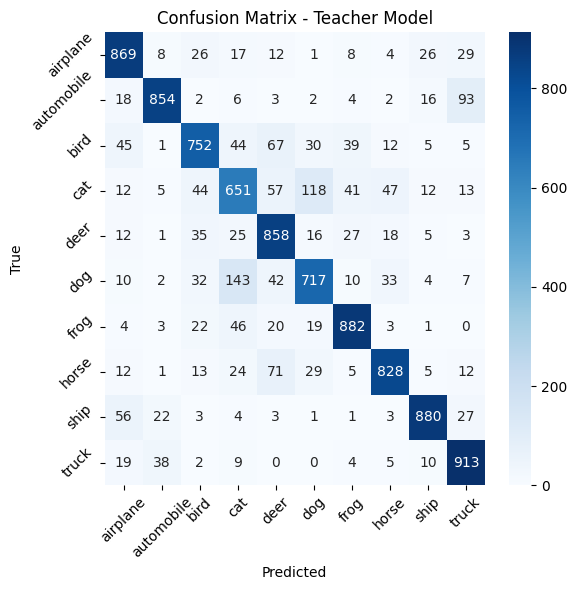

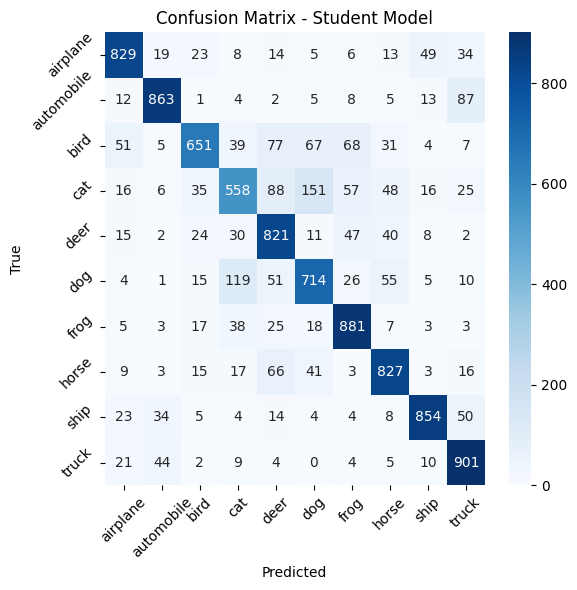

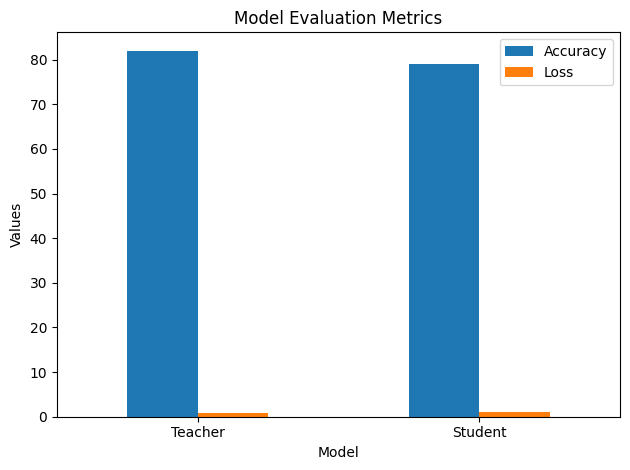

In [5]:


class ModelEvaluator:
    def __init__(self, teacher_model, student_model, test_loader, device):
        # Initialize models, data loader, and device
        self.teacher_model = teacher_model
        self.student_model = student_model
        self.test_loader = test_loader
        self.device = device
        # Define class names for visualization
        self.class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                           'dog', 'frog', 'horse', 'ship', 'truck']

    def evaluate_model(self, model, model_name):
        # Evaluate the model on the test set
        model.eval()
        all_predictions = []
        all_targets = []
        test_loss = 0
        correct = 0
        total = 0
        criterion = torch.nn.CrossEntropyLoss()

        with torch.no_grad():
            for inputs, targets in tqdm(self.test_loader, desc=f"Evaluating {model_name}"):
                # Move data to the correct device
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                # Update metrics
                test_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                # Collect predictions and targets for reporting
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        avg_loss = test_loss / len(self.test_loader.dataset)
        
        return {
            'predictions': all_predictions,
            'targets': all_targets,
            'accuracy': accuracy,
            'loss': avg_loss
        }

    def plot_confusion_matrix(self, true_labels, predictions, model_name):
        # Generate and plot the confusion matrix
        cm = confusion_matrix(true_labels, predictions)
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def plot_metrics(self, teacher_results, student_results):
        # Create a DataFrame for metrics visualization
        metrics_df = pd.DataFrame({
            'Model': ['Teacher', 'Student'],
            'Accuracy': [teacher_results['accuracy'], student_results['accuracy']],
            'Loss': [teacher_results['loss'], student_results['loss']]
        })
        
        # Plot metrics as bar charts
        metrics_df.set_index('Model').plot(kind='bar')
        plt.title('Model Evaluation Metrics')
        plt.ylabel('Values')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

    def evaluate_and_compare(self):
        # Evaluate both models
        teacher_results = self.evaluate_model(self.teacher_model, "Teacher")
        student_results = self.evaluate_model(self.student_model, "Student")

        # Print classification reports
        print("\nTeacher Model Classification Report:")
        print(classification_report(teacher_results['targets'], 
                                 teacher_results['predictions'],
                                 target_names=self.class_names))
        
        print("\nStudent Model Classification Report:")
        print(classification_report(student_results['targets'], 
                                 student_results['predictions'],
                                 target_names=self.class_names))

        # Print overall metrics
        print("\nOverall Metrics:")
        print(f"Teacher - Test Accuracy: {teacher_results['accuracy']:.2f}%, Test Loss: {teacher_results['loss']:.4f}")
        print(f"Student - Test Accuracy: {student_results['accuracy']:.2f}%, Test Loss: {student_results['loss']:.4f}")

        # Plot confusion matrices
        self.plot_confusion_matrix(teacher_results['targets'], 
                                 teacher_results['predictions'], 
                                 "Teacher Model")
        self.plot_confusion_matrix(student_results['targets'], 
                                 student_results['predictions'], 
                                 "Student Model")
        
        # Plot evaluation metrics
        self.plot_metrics(teacher_results, student_results)

def main():
    # Initialize your models and data
    model_trainer = ModelTrainer()
    data_manager = DataManager()
    dataloaders = data_manager.load_data()
    
    # Create models
    teacher_model, student_model = model_trainer.create_models()
    
    # Load saved model weights
    teacher_model.load_state_dict(torch.load('teacher_model_strat1.pth'))
    student_model.load_state_dict(torch.load('student_model_strat1.pth'))
    
    # Set models to evaluation mode
    teacher_model.eval()
    student_model.eval()
    
    # Create evaluator and run evaluation
    evaluator = ModelEvaluator(
        teacher_model=teacher_model,
        student_model=student_model,
        test_loader=dataloaders['test'],
        device=model_trainer.device
    )
    
    evaluator.evaluate_and_compare()

if __name__ == "__main__":
    main()


##### Overfitting Signs: Both models show higher training metrics compared to validation and test, suggesting some degree of overfitting.
##### Teacher-Student Gap: The teacher consistently outperforms the student, likely due to its larger capacity and deeper architecture.

#### Distillation Strat 1 student 

Files already downloaded and verified


C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:76: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (Se

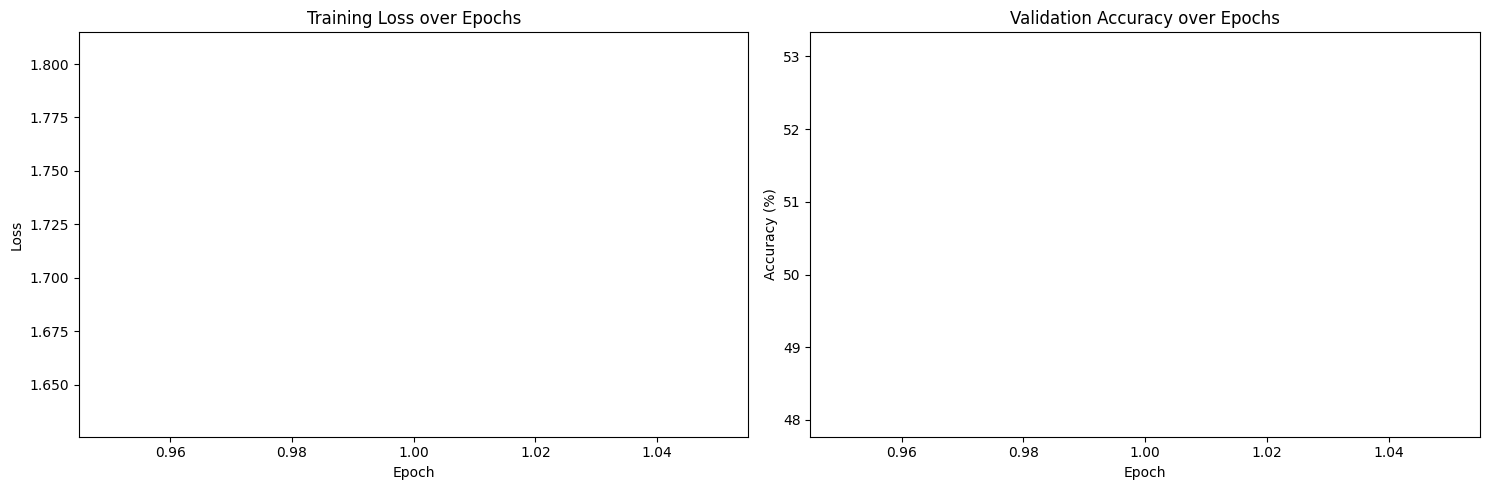

2024-12-22 16:37:55,284 - INFO - Epoch [1/10] - Loss: 1.7202
Epoch 2/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]
2024-12-22 16:38:21,298 - INFO - Validation Accuracy: 70.02%


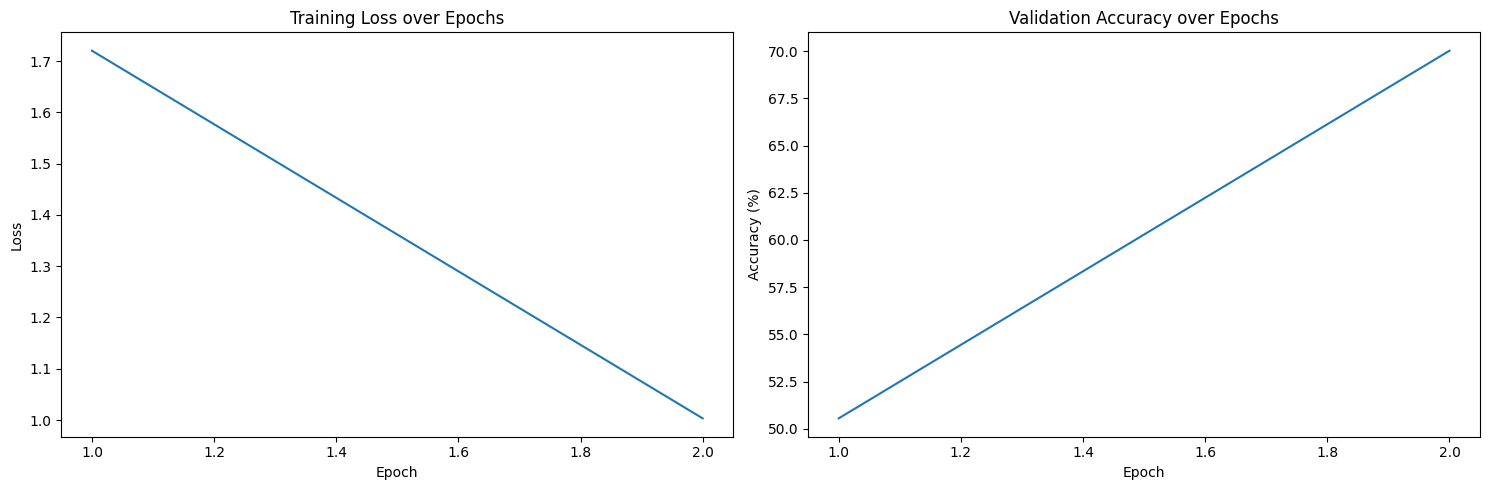

2024-12-22 16:38:21,475 - INFO - Epoch [2/10] - Loss: 1.0034
Epoch 3/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.28s/it]
2024-12-22 16:38:47,851 - INFO - Validation Accuracy: 75.29%


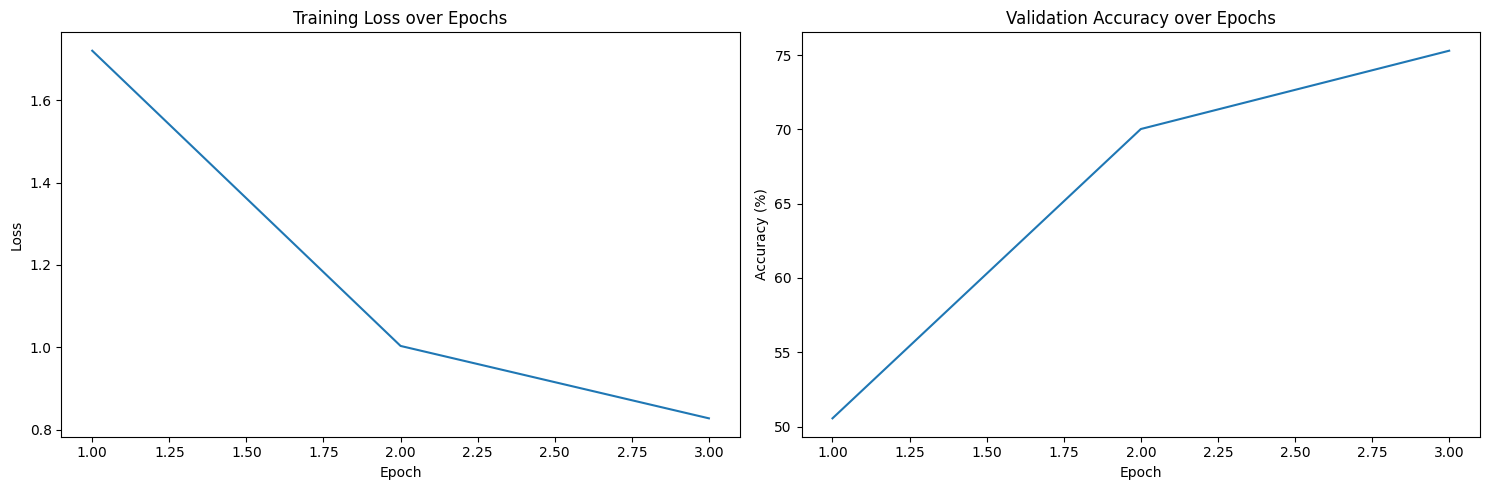

2024-12-22 16:38:48,034 - INFO - Epoch [3/10] - Loss: 0.8275
Epoch 4/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:10<00:00,  2.17s/it]
2024-12-22 16:39:13,249 - INFO - Validation Accuracy: 75.42%


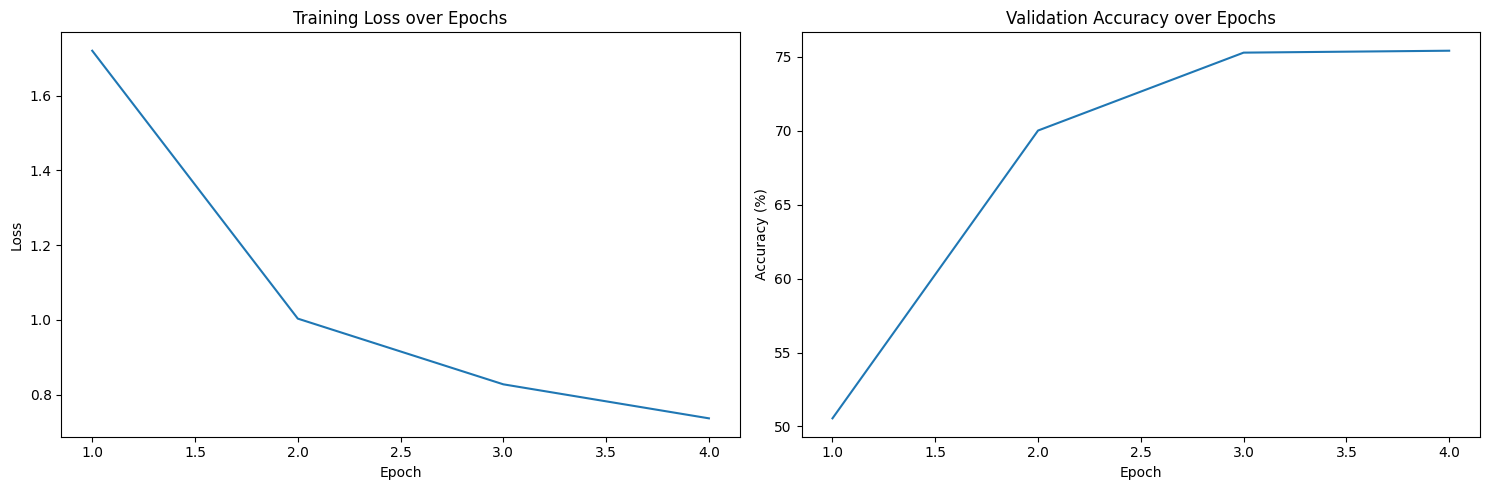

2024-12-22 16:39:13,414 - INFO - Epoch [4/10] - Loss: 0.7365
Epoch 5/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.21s/it]
2024-12-22 16:39:38,728 - INFO - Validation Accuracy: 79.55%


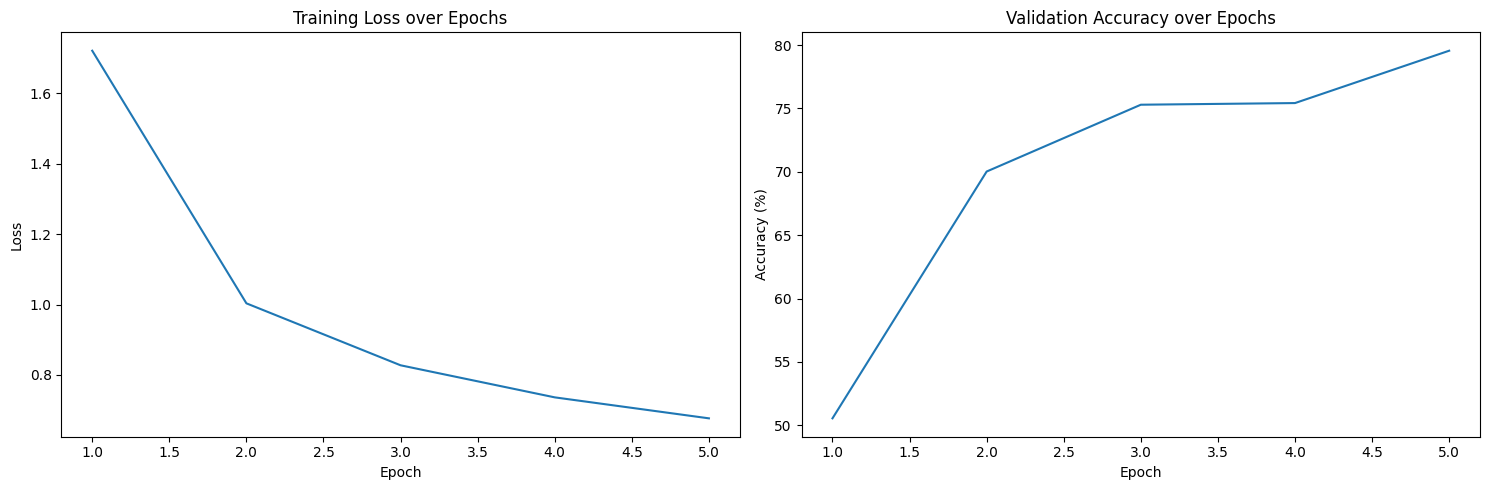

2024-12-22 16:39:38,915 - INFO - Epoch [5/10] - Loss: 0.6770
Epoch 6/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]
2024-12-22 16:40:04,380 - INFO - Validation Accuracy: 77.79%


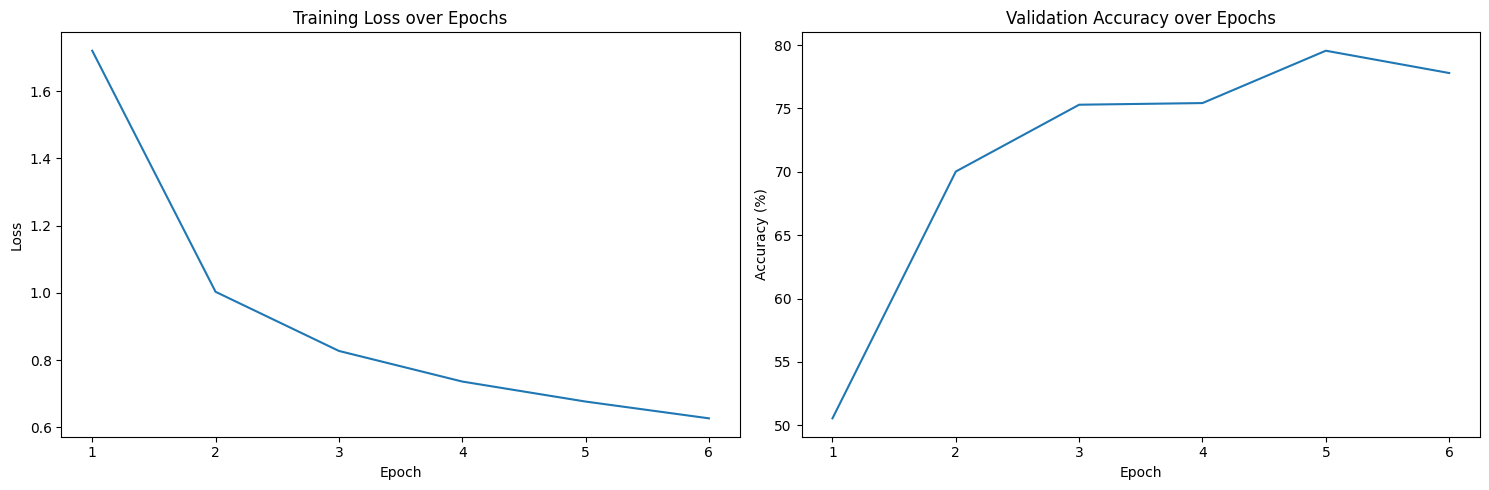

2024-12-22 16:40:04,659 - INFO - Epoch [6/10] - Loss: 0.6271
Epoch 7/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]
2024-12-22 16:40:30,461 - INFO - Validation Accuracy: 79.56%


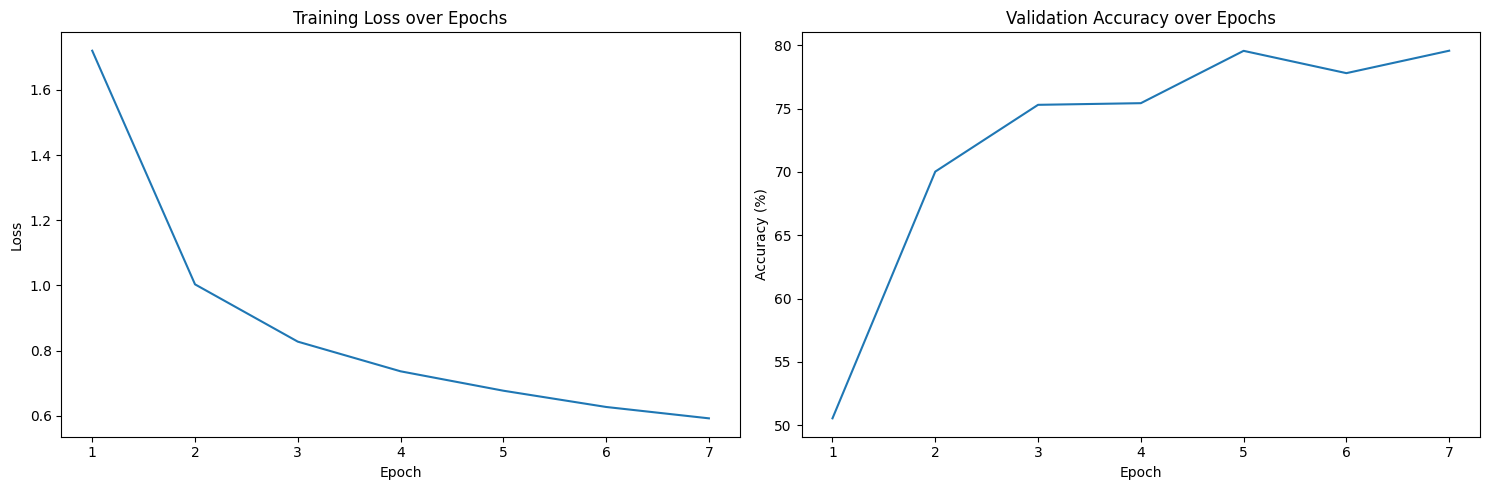

2024-12-22 16:40:30,719 - INFO - Epoch [7/10] - Loss: 0.5922
Epoch 8/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]
2024-12-22 16:40:56,458 - INFO - Validation Accuracy: 80.50%


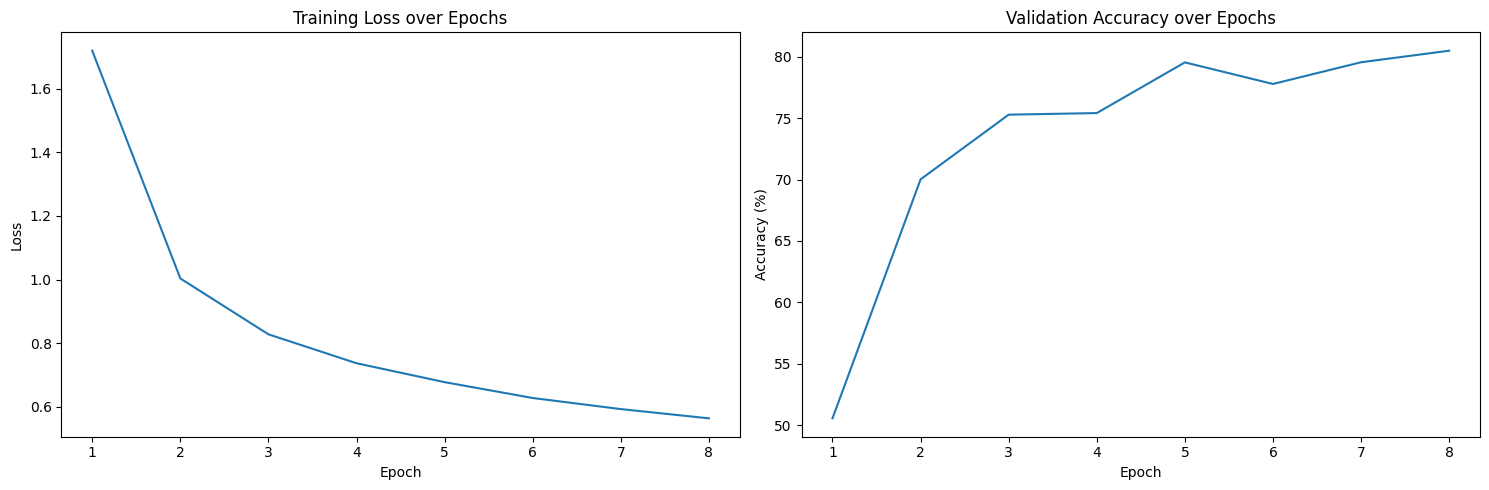

2024-12-22 16:40:56,632 - INFO - Epoch [8/10] - Loss: 0.5631
Epoch 9/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.26s/it]
2024-12-22 16:41:22,253 - INFO - Validation Accuracy: 77.77%


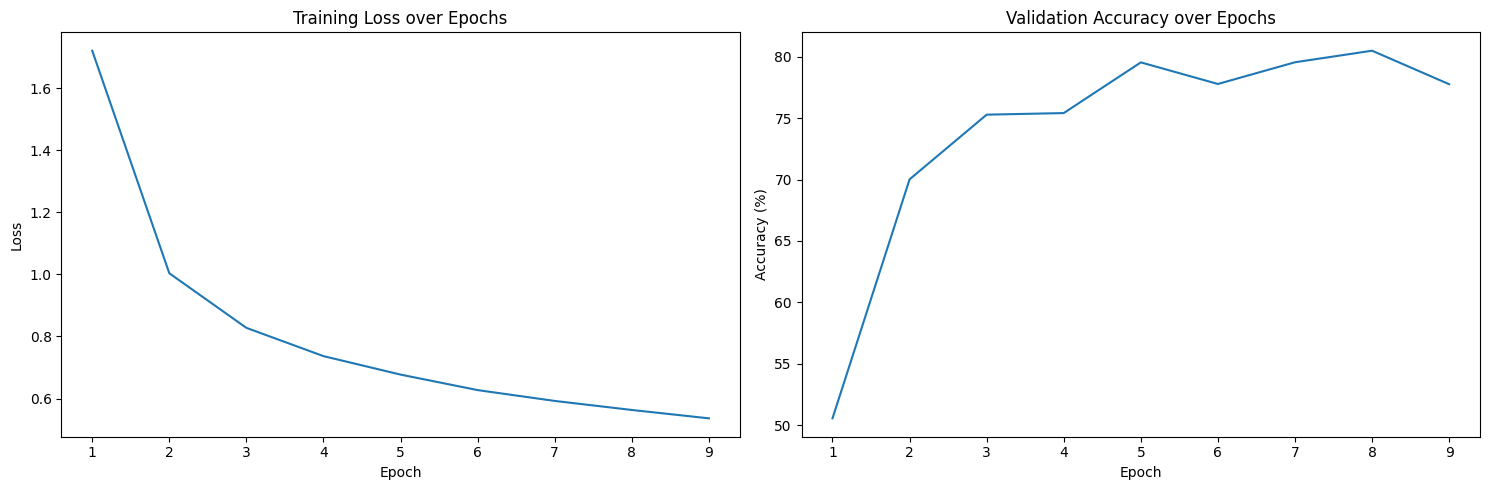

2024-12-22 16:41:22,447 - INFO - Epoch [9/10] - Loss: 0.5361
Epoch 10/10:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\18928090.py:114: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=Config.MIXED_PRECISION):
Validating: 100%|██████████| 5/5 [00:11<00:00,  2.25s/it]
2024-12-22 16:41:48,249 - INFO - Validation Accuracy: 79.14%


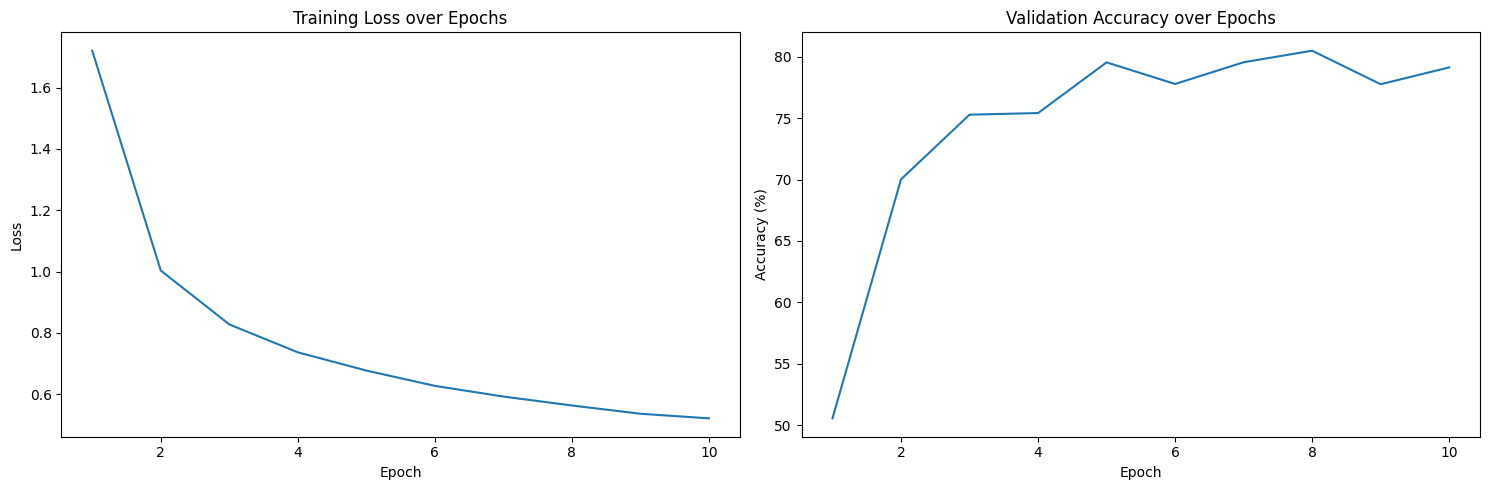

2024-12-22 16:41:48,419 - INFO - Epoch [10/10] - Loss: 0.5212
Evaluating: 100%|██████████| 5/5 [00:11<00:00,  2.24s/it]
2024-12-22 16:41:59,607 - INFO - Test Accuracy: 79.02%


,precision,recall,f1-score,support
airplane,0.745423,0.878726,0.806604,973.0000
automobile,0.838768,0.916832,0.876064,1010.0000
bird,0.794731,0.719682,0.755347,1006.0000
cat,0.537364,0.817994,0.648626,967.0000
deer,0.868531,0.644860,0.740167,963.0000
dog,0.809816,0.644531,0.717781,1024.0000
frog,0.941176,0.764878,0.843918,1025.0000
horse,0.776055,0.870531,0.820583,1035.0000
ship,0.917808,0.805611,0.858058,998.0000
truck,0.865424,0.836837,0.850891,999.0000


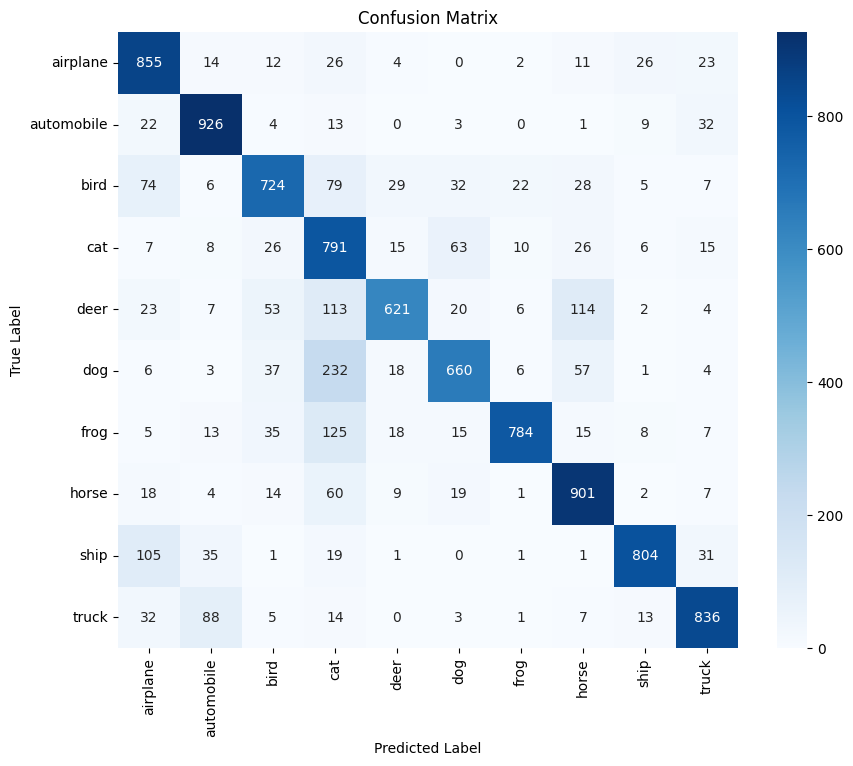

In [6]:

# Configure Logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class MetricsVisualizer:
    """
    Utility class to track and visualize training metrics
    Handles the creation and updating of training/validation plots
    """
    def __init__(self):
        self.metrics = {
            'train_loss': [],
            'val_accuracy': [],
            'epochs': []
        }
        
    def update_metrics(self, epoch, train_loss, val_accuracy):
        """Records metrics for each epoch"""
        self.metrics['epochs'].append(epoch)
        self.metrics['train_loss'].append(train_loss)
        self.metrics['val_accuracy'].append(val_accuracy)
        
    def plot_metrics(self):
        """Generates and displays training progress plots"""
        df = pd.DataFrame(self.metrics)
        
        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Plot training loss
        sns.lineplot(data=df, x='epochs', y='train_loss', ax=ax1)
        ax1.set_title('Training Loss over Epochs')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Loss')
        
        # Plot validation accuracy
        sns.lineplot(data=df, x='epochs', y='val_accuracy', ax=ax2)
        ax2.set_title('Validation Accuracy over Epochs')
        ax2.set_xlabel('Epoch')
        ax2.set_ylabel('Accuracy (%)')
        
        plt.tight_layout()
        display(plt.gcf())
        plt.close()

class Config:
    BATCH_SIZE = 2048
    NUM_EPOCHS = 10
    LEARNING_RATE = 1e-3
    ALPHA = 0.15  # Weight for KD loss
    TEMPERATURE = 2.0  # Temperature for softening probabilities
    NUM_WORKERS = 4
    PIN_MEMORY = True
    MIXED_PRECISION = True
    TRAIN_SPLIT = 0.6
    VAL_SPLIT = 0.2
    TEST_SPLIT = 0.2

class DistillationTrainer:
    def __init__(self, train_loader, val_loader, test_loader, device):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device
        self.teacher_model = self.load_teacher_model("teacher_model_strat1.pth")
        self.student_model = self.load_student_model()
        self.optimizer = optim.Adam(self.student_model.parameters(), lr=Config.LEARNING_RATE)
        self.scaler = GradScaler(enabled=Config.MIXED_PRECISION)
        # Initialize metrics visualizer
        self.visualizer = MetricsVisualizer()

    def load_teacher_model(self, model_file):
        # Load and configure the teacher ResNet50 model
        # Returns the model ready for knowledge distillation
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(2048, 10)
        model.load_state_dict(torch.load(model_file, map_location=self.device))
        model.eval()
        model.to(self.device)
        logging.info(f"Successfully loaded teacher model from {model_file}")
        return model

    def load_student_model(self):
        # Initialize the student ResNet18 model with ImageNet weights
        # Configure the final layer for CIFAR10 classification
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(512, 10)
        model.to(self.device)
        logging.info("Loaded student model with ImageNet pretrained weights.")
        return model

    def get_teacher_probs(self, inputs):
        # Generate soft targets from teacher model
        # Apply temperature scaling for knowledge distillation
        with torch.no_grad():
            teacher_logits = self.teacher_model(inputs)
            teacher_probs = F.softmax(teacher_logits / Config.TEMPERATURE, dim=1)
        return teacher_probs

    def train(self):
        logging.info("Starting knowledge distillation training...")
        criterion_ce = nn.CrossEntropyLoss()
        criterion_kd = nn.KLDivLoss(reduction="batchmean")

        for epoch in range(Config.NUM_EPOCHS):
            self.student_model.train()
            running_loss = 0.0
            
            # Training loop with progress bar
            for inputs, targets in tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{Config.NUM_EPOCHS}"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                teacher_probs = self.get_teacher_probs(inputs)
                
                with autocast(enabled=Config.MIXED_PRECISION):
                    student_logits = self.student_model(inputs)
                    student_probs = F.log_softmax(student_logits / Config.TEMPERATURE, dim=1)
                    
                    loss_ce = criterion_ce(student_logits, targets)
                    loss_kd = criterion_kd(student_probs, teacher_probs) * (Config.TEMPERATURE ** 2)
                    loss = (1 - Config.ALPHA) * loss_ce + Config.ALPHA * loss_kd

                self.scaler.scale(loss).backward()
                self.scaler.step(self.optimizer)
                self.scaler.update()
                self.optimizer.zero_grad()
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(self.train_loader.dataset)
            # Validate and update metrics
            val_accuracy = self.validate()
            self.visualizer.update_metrics(epoch + 1, epoch_loss, val_accuracy)
            self.visualizer.plot_metrics()
            
            logging.info(f"Epoch [{epoch+1}/{Config.NUM_EPOCHS}] - Loss: {epoch_loss:.4f}")

    def validate(self):
        # Evaluate student model on validation set
        # Returns accuracy percentage
        self.student_model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in tqdm(self.val_loader, desc="Validating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)

        accuracy = 100. * correct / total
        logging.info(f"Validation Accuracy: {accuracy:.2f}%")
        return accuracy

    def evaluate(self):
        # Final evaluation on test set
        # Generates detailed classification report
        self.student_model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for inputs, targets in tqdm(self.test_loader, desc="Evaluating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        logging.info(f"Test Accuracy: {accuracy:.2f}%")
        
        # Generate and display classification report
        report_dict = classification_report(all_targets, all_preds, 
                                         target_names=self.get_class_names(), 
                                         output_dict=True)
        df_report = pd.DataFrame(report_dict).transpose()
        display(df_report)
        
        # Plot confusion matrix
        cm = confusion_matrix(all_targets, all_preds)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=self.get_class_names(),
                   yticklabels=self.get_class_names())
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        display(plt.gcf())
        plt.close()
        
        return accuracy

    def get_class_names(self):
        return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def main():
    # Setup CUDA memory management and device configuration
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
    torch.cuda.empty_cache()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Define data transformations for CIFAR10
    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    # Load and split dataset into train, validation, and test sets
    full_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(Config.TRAIN_SPLIT * len(full_dataset))
    val_size = int(Config.VAL_SPLIT * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

    # Create data loaders for each dataset split
    train_loader = DataLoader(train_dataset, batch_size=Config.BATCH_SIZE, shuffle=True,
                              num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                            num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    test_loader = DataLoader(test_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                             num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    # Initialize and run training
    trainer = DistillationTrainer(train_loader, val_loader, test_loader, device)
    trainer.train()
    trainer.evaluate()

if __name__ == "__main__":
    main()

The test accuracy after distillation improved marginally from 78.99% to 79.02%, indicating that the distillation process had minimal impact on the student's performance. This suggests that the student model was already performing near its capacity, with limited room for further enhancement through distillation. The minimal gain also reflects a possible mismatch in how effectively the knowledge from the teacher was transferred to the student. Despite the slight improvement, the overall performance remains nearly identical, pointing to the need for a closer evaluation of the factors influencing the distillation outcome.

#### Feature Map and scores Distillation

In [7]:
class Config:
    BATCH_SIZE = 128
    NUM_EPOCHS = 10
    LEARNING_RATE = 1e-3
    ALPHA = 0.15  # Weight for logit KD loss
    BETA = 0.25   # Weight for feature KD loss
    TEMPERATURE = 2.0
    NUM_WORKERS = 4
    PIN_MEMORY = True
    MIXED_PRECISION = True
    TRAIN_SPLIT = 0.6
    VAL_SPLIT = 0.2
    TEST_SPLIT = 0.2

class FeatureHook:
    """Hook to capture intermediate feature maps"""
    def __init__(self):
        self.features = None
        
    def __call__(self, module, input, output):
        self.features = output

class ResNetWithHooks(nn.Module):
    """Wrapper for ResNet models to capture intermediate features"""
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.features = {}
        
        # Register hooks to capture layer outputs
        self.hooks = [
            self.model.layer1[-1].register_forward_hook(self._get_hook('layer1')),
            self.model.layer2[-1].register_forward_hook(self._get_hook('layer2')),
            self.model.layer3[-1].register_forward_hook(self._get_hook('layer3')),
            self.model.layer4[-1].register_forward_hook(self._get_hook('layer4'))
        ]
        
    def _get_hook(self, layer_name):
        def hook(module, input, output):
            self.features[layer_name] = output
        return hook
        
    def forward(self, x):
        return self.model(x)

class FeatureAdaptor(nn.Module):
    """Adapts student features to match teacher feature dimensions"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.adaptor = nn.Conv2d(in_channels, out_channels, 1)
        
    def forward(self, x):
        return self.adaptor(x)

class DistillationTrainer:
    def __init__(self, train_loader, val_loader, test_loader, device):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device
        
        # Initialize models with hooks
        self.teacher_model = self._init_teacher_model("teacher_model_strat1.pth")
        self.student_model = self._init_student_model()
        
        # Freeze teacher parameters
        for param in self.teacher_model.parameters():
            param.requires_grad = False
            
        # Initialize feature adaptors
        self.feature_adaptors = self._init_feature_adaptors()
        
        # Combined parameters for optimization
        params = list(self.student_model.parameters()) + \
                [p for adaptor in self.feature_adaptors.values() for p in adaptor.parameters()]
        
        self.optimizer = optim.Adam(params, lr=Config.LEARNING_RATE)
        self.scaler = GradScaler(enabled=Config.MIXED_PRECISION)

    def _init_teacher_model(self, model_file):
        base_model = models.resnet50(pretrained=True)
        base_model.fc = nn.Linear(2048, 10)
        base_model.load_state_dict(torch.load(model_file, map_location=self.device))
        model = ResNetWithHooks(base_model)
        model.eval()
        model.to(self.device)
        logging.info(f"Loaded teacher model from {model_file}")
        return model

    def _init_student_model(self):
        base_model = models.resnet18(pretrained=True)
        base_model.fc = nn.Linear(512, 10)
        model = ResNetWithHooks(base_model)
        model.to(self.device)
        logging.info("Loaded student model with ImageNet pretrained weights")
        return model

    def _init_feature_adaptors(self):
        # Channel sizes for ResNet18 -> ResNet50 adaptation
        adaptors = nn.ModuleDict({
            'layer1': FeatureAdaptor(64, 256),
            'layer2': FeatureAdaptor(128, 512),
            'layer3': FeatureAdaptor(256, 1024),
            'layer4': FeatureAdaptor(512, 2048)
        })
        adaptors.to(self.device)
        return adaptors

    def feature_loss(self, student_features, teacher_features):
        loss = 0
        for layer_name in student_features:
            adapted_student = self.feature_adaptors[layer_name](student_features[layer_name])
            # Normalize features
            s_norm = F.normalize(adapted_student.view(adapted_student.size(0), -1), dim=1)
            t_norm = F.normalize(teacher_features[layer_name].view(teacher_features[layer_name].size(0), -1), dim=1)
            # Compute MSE loss between normalized features
            loss += F.mse_loss(s_norm, t_norm)
        return loss / len(student_features)

    def train(self):
        logging.info("Starting enhanced knowledge distillation training...")
        criterion_ce = nn.CrossEntropyLoss()
        criterion_kd = nn.KLDivLoss(reduction="batchmean")

        for epoch in range(Config.NUM_EPOCHS):
            self.student_model.train()
            running_loss = 0.0
            
            for inputs, targets in tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{Config.NUM_EPOCHS}"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                with torch.no_grad():
                    # Get teacher outputs and features
                    teacher_logits = self.teacher_model(inputs)
                    teacher_probs = F.softmax(teacher_logits / Config.TEMPERATURE, dim=1)
                    teacher_features = self.teacher_model.features.copy()

                with autocast(enabled=Config.MIXED_PRECISION):
                    # Get student outputs and features
                    student_logits = self.student_model(inputs)
                    student_probs = F.log_softmax(student_logits / Config.TEMPERATURE, dim=1)
                    student_features = self.student_model.features
                    
                    # Calculate losses
                    loss_ce = criterion_ce(student_logits, targets)
                    loss_kd = criterion_kd(student_probs, teacher_probs) * (Config.TEMPERATURE ** 2)
                    loss_feat = self.feature_loss(student_features, teacher_features)
                    
                    # Combine losses
                    loss = (1 - Config.ALPHA - Config.BETA) * loss_ce + \
                           Config.ALPHA * loss_kd + \
                           Config.BETA * loss_feat

                # Backward and optimization
                self.optimizer.zero_grad()
                self.scaler.scale(loss).backward()
                self.scaler.step(self.optimizer)
                self.scaler.update()
                
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(self.train_loader.dataset)
            logging.info(f"Epoch [{epoch+1}/{Config.NUM_EPOCHS}] - Loss: {epoch_loss:.4f}")
            self.validate()


    def validate(self):
        self.student_model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in tqdm(self.val_loader, desc="Validating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)

        accuracy = 100. * correct / total
        logging.info(f"Validation Accuracy: {accuracy:.2f}%")

    def evaluate(self):
        self.student_model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        
        with torch.no_grad():
            for inputs, targets in tqdm(self.test_loader, desc="Evaluating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        logging.info(f"Test Accuracy: {accuracy:.2f}%")
        print("Classification Report:")
        print(classification_report(all_targets, all_preds, 
              target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))
        return accuracy

# Main function remains the same
def main():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
    torch.cuda.empty_cache()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    full_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(Config.TRAIN_SPLIT * len(full_dataset))
    val_size = int(Config.VAL_SPLIT * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

    train_loader = DataLoader(train_dataset, batch_size=Config.BATCH_SIZE, shuffle=True,
                              num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                            num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    test_loader = DataLoader(test_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                             num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    trainer = DistillationTrainer(train_loader, val_loader, test_loader, device)
    trainer.train()
    trainer.evaluate()

if __name__ == "__main__":
    main()

Files already downloaded and verified


C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\utilisateur\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_25360\1152585540.py:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (

Classification Report:
              precision    recall  f1-score   support

    airplane       0.66      0.93      0.77       973
  automobile       0.91      0.88      0.89      1010
        bird       0.80      0.74      0.77      1006
         cat       0.61      0.71      0.66       967
        deer       0.82      0.77      0.79       963
         dog       0.79      0.67      0.73      1024
        frog       0.91      0.86      0.89      1025
       horse       0.87      0.85      0.86      1035
        ship       0.87      0.82      0.84       998
       truck       0.89      0.82      0.85       999

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.82      0.80      0.81     10000



With feature map (FM) and score distillation, the test accuracy improved significantly to 80.41%, compared to the baseline accuracy of 78.99% and the marginal improvement observed with basic distillation (79.02%). This demonstrates that incorporating FM and score distillation enhances the transfer of knowledge from the teacher to the student, effectively boosting the student model's performance. The results highlight the value of leveraging intermediate representations and output scores for a more comprehensive and impactful distillation process.

<img src="output(9).png" alt="Image" width="400" height="300">

# STRATEGY 2 : Use a non pretrained student.

##### DATA SPLIT + TRAINING PRETRAINED TEACHER AND Non PRETRAINED STUDENT

Files already downloaded and verified
Files already downloaded and verified


c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is 

Epoch 1: Teacher Train F1: 0.5615, Val F1: 0.2399, Train Loss: 1.2992, Val Loss: 7.1870
Epoch 1: Student Train F1: 0.3704, Val F1: 0.1422, Train Loss: 1.7699, Val Loss: 2.3973


Epochs Progress:  20%|██        | 2/10 [00:34<02:16, 17.02s/it]

Epoch 2: Teacher Train F1: 0.8100, Val F1: 0.7524, Train Loss: 0.5669, Val Loss: 0.8706
Epoch 2: Student Train F1: 0.5538, Val F1: 0.3474, Train Loss: 1.2325, Val Loss: 1.8760


Epochs Progress:  30%|███       | 3/10 [00:51<01:58, 16.98s/it]

Epoch 3: Teacher Train F1: 0.8889, Val F1: 0.8075, Train Loss: 0.3354, Val Loss: 0.5965
Epoch 3: Student Train F1: 0.6515, Val F1: 0.4324, Train Loss: 0.9781, Val Loss: 1.7312


Epochs Progress:  40%|████      | 4/10 [01:08<01:41, 16.95s/it]

Epoch 4: Teacher Train F1: 0.9448, Val F1: 0.8051, Train Loss: 0.1692, Val Loss: 0.7031
Epoch 4: Student Train F1: 0.7402, Val F1: 0.5684, Train Loss: 0.7368, Val Loss: 1.2659


Epochs Progress:  50%|█████     | 5/10 [01:24<01:24, 16.93s/it]

Epoch 5: Teacher Train F1: 0.9674, Val F1: 0.8002, Train Loss: 0.1022, Val Loss: 0.8298
Epoch 5: Student Train F1: 0.8213, Val F1: 0.5610, Train Loss: 0.5240, Val Loss: 1.4067


Epochs Progress:  60%|██████    | 6/10 [01:41<01:07, 16.89s/it]

Epoch 6: Teacher Train F1: 0.9738, Val F1: 0.8024, Train Loss: 0.0801, Val Loss: 0.7845
Epoch 6: Student Train F1: 0.8823, Val F1: 0.5711, Train Loss: 0.3440, Val Loss: 1.5348


Epochs Progress:  70%|███████   | 7/10 [01:58<00:50, 16.91s/it]

Epoch 7: Teacher Train F1: 0.9764, Val F1: 0.7988, Train Loss: 0.0714, Val Loss: 0.8690
Epoch 7: Student Train F1: 0.9250, Val F1: 0.5678, Train Loss: 0.2211, Val Loss: 1.6876


Epochs Progress:  80%|████████  | 8/10 [02:15<00:33, 16.92s/it]

Epoch 8: Teacher Train F1: 0.9791, Val F1: 0.7986, Train Loss: 0.0645, Val Loss: 0.9009
Epoch 8: Student Train F1: 0.9367, Val F1: 0.5706, Train Loss: 0.1819, Val Loss: 1.9130


Epochs Progress:  90%|█████████ | 9/10 [02:32<00:16, 16.90s/it]

Epoch 9: Teacher Train F1: 0.9830, Val F1: 0.7997, Train Loss: 0.0517, Val Loss: 0.9529
Epoch 9: Student Train F1: 0.9465, Val F1: 0.5855, Train Loss: 0.1534, Val Loss: 1.8448


Epochs Progress: 100%|██████████| 10/10 [02:50<00:00, 17.02s/it]

Epoch 10: Teacher Train F1: 0.9824, Val F1: 0.8109, Train Loss: 0.0510, Val Loss: 0.8818
Epoch 10: Student Train F1: 0.9571, Val F1: 0.6013, Train Loss: 0.1247, Val Loss: 1.8900


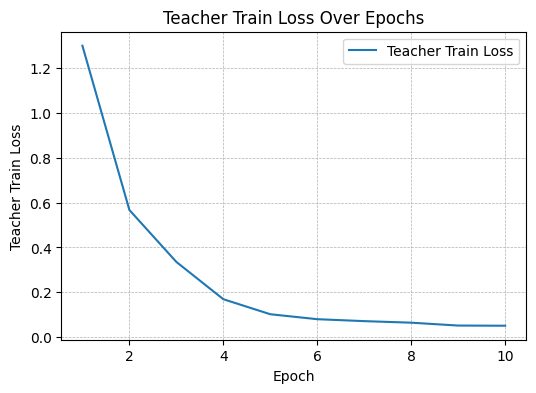

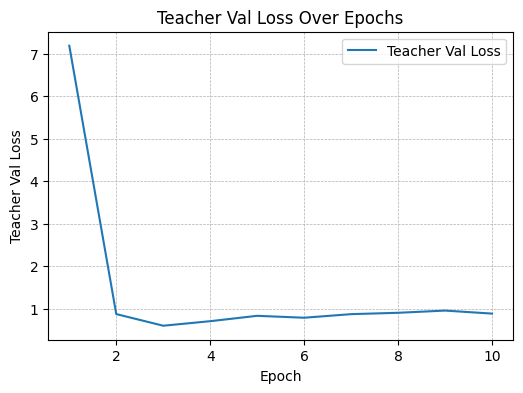

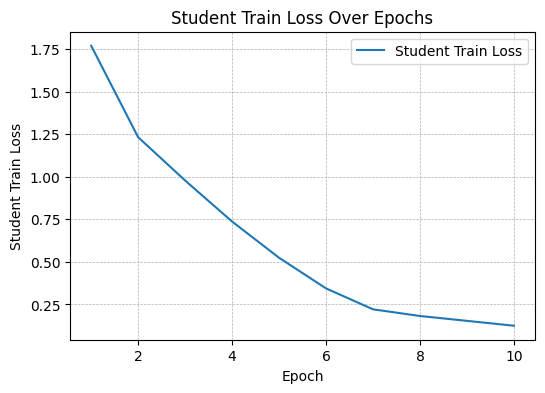

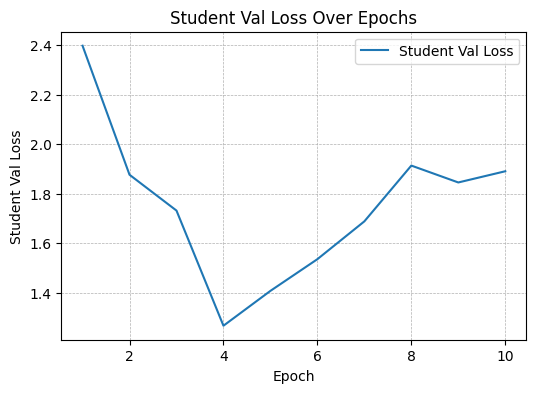

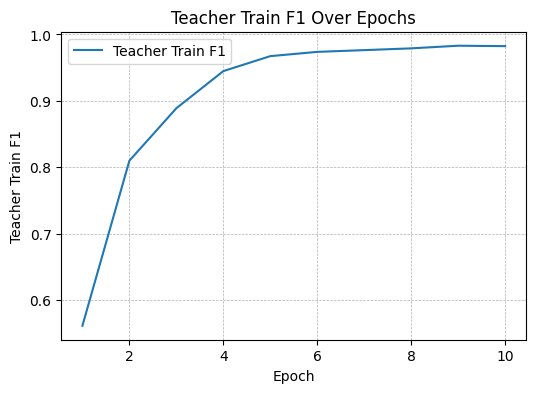

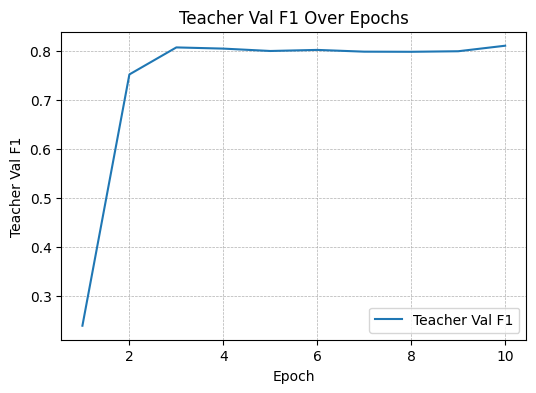

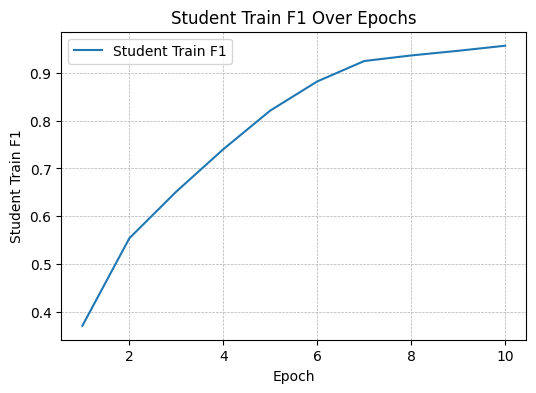

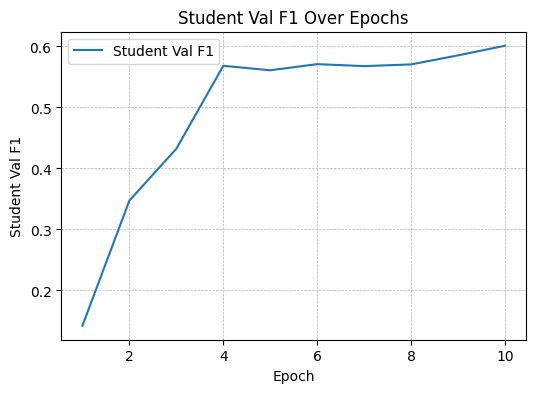

   Epoch  Teacher Train F1  Teacher Val F1  Student Train F1  Student Val F1  \
0      1          0.561524        0.239932          0.370370        0.142245   
1      2          0.809978        0.752379          0.553755        0.347389   
2      3          0.888922        0.807501          0.651515        0.432401   
3      4          0.944807        0.805060          0.740208        0.568365   
4      5          0.967358        0.800206          0.821257        0.560999   
5      6          0.973764        0.802403          0.882275        0.571079   
6      7          0.976393        0.798829          0.925022        0.567843   
7      8          0.979066        0.798570          0.936711        0.570631   
8      9          0.983029        0.799674          0.946468        0.585525   
9     10          0.982398        0.810945          0.957088        0.601263   

   Teacher Train Loss  Teacher Val Loss  Student Train Loss  Student Val Loss  
0            1.299163          7.186979

In [6]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader
from tqdm import tqdm
from sklearn.metrics import f1_score

class ModelTrainer:
    def __init__(self, device='cuda'):
        self.device = torch.device('cuda' if torch.cuda.is_available() and device=='cuda' else 'cpu')
        self.configure_cuda()
        
    @staticmethod
    def configure_cuda():
        os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
        torch.cuda.empty_cache()

    def create_models(self):
        teacher_model = models.resnet50(pretrained=True)
        teacher_model.fc = nn.Linear(2048, 10)
        
        student_model = models.resnet18(pretrained=False)
        student_model.fc = nn.Linear(512, 10)
        
        return teacher_model.to(self.device), student_model.to(self.device)

class DataManager:
    def __init__(self, batch_size=2048):
        self.batch_size = batch_size
        self.transform = self.get_transform()
        
    @staticmethod
    def get_transform():
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    
    def load_data(self):
        train_full = datasets.CIFAR10(root='./data', train=True, download=True, transform=self.transform)
        test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=self.transform)
        
        total_train = len(train_full)
        train_size = int(0.60 * total_train)
        val_size = int(0.20 * total_train)
        test_size = total_train - train_size - val_size
        
        train_dataset, val_dataset, _ = random_split(train_full, [train_size, val_size, test_size])
        
        return {
            'train': DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True),
            'val': DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False),
            'test': DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)
        }

class Trainer:
    def __init__(self, model, criterion, optimizer, device):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        
    def train_epoch(self, train_loader):
        self.model.train()
        running_loss, correct, total = 0.0, 0, 0
        all_targets, all_predictions = [], []
        
        for inputs, targets in tqdm(train_loader, desc="Training", leave=False):
            inputs, targets = inputs.to(self.device), targets.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets)
            loss.backward()
            self.optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            
        metrics = {
            'loss': running_loss / len(train_loader.dataset),
            'accuracy': 100. * correct / total,
            'f1': f1_score(all_targets, all_predictions, average='weighted')
        }
        
        return metrics
    
    def evaluate(self, val_loader):
        self.model.eval()
        val_loss, correct, total = 0.0, 0, 0
        all_targets, all_predictions = [], []
        
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc="Validating", leave=False):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                all_targets.extend(targets.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                
        metrics = {
            'loss': val_loss / len(val_loader.dataset),
            'accuracy': 100. * correct / total,
            'f1': f1_score(all_targets, all_predictions, average='weighted')
        }
        
        return metrics

class ResultVisualizer:
    @staticmethod
    def plot_metrics(results, metrics):
        for metric in metrics:
            plt.figure(figsize=(6, 4))
            plt.plot(results['Epoch'], results[metric], label=metric)
            plt.title(f'{metric} Over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.legend()
            plt.show()

def main():
    model_trainer = ModelTrainer()
    data_manager = DataManager()
    dataloaders = data_manager.load_data()
    teacher_model, student_model = model_trainer.create_models()
    
    criterion = nn.CrossEntropyLoss()
    optimizer_teacher = optim.Adam(teacher_model.parameters(), lr=0.001)
    optimizer_student = optim.Adam(student_model.parameters(), lr=0.001)
    
    teacher_trainer = Trainer(teacher_model, criterion, optimizer_teacher, model_trainer.device)
    student_trainer = Trainer(student_model, criterion, optimizer_student, model_trainer.device)
    
    num_epochs = 10
    results = {
        'Epoch': [], 'Teacher Train F1': [], 'Teacher Val F1': [],
        'Student Train F1': [], 'Student Val F1': [],
        'Teacher Train Loss': [], 'Teacher Val Loss': [],
        'Student Train Loss': [], 'Student Val Loss': []
    }
    
    for epoch in tqdm(range(1, num_epochs + 1), desc="Epochs Progress"):
        teacher_train_metrics = teacher_trainer.train_epoch(dataloaders['train'])
        teacher_val_metrics = teacher_trainer.evaluate(dataloaders['val'])
        student_train_metrics = student_trainer.train_epoch(dataloaders['train'])
        student_val_metrics = student_trainer.evaluate(dataloaders['val'])
        
        results['Epoch'].append(epoch)
        results['Teacher Train F1'].append(teacher_train_metrics['f1'])
        results['Teacher Val F1'].append(teacher_val_metrics['f1'])
        results['Student Train F1'].append(student_train_metrics['f1'])
        results['Student Val F1'].append(student_val_metrics['f1'])
        results['Teacher Train Loss'].append(teacher_train_metrics['loss'])
        results['Teacher Val Loss'].append(teacher_val_metrics['loss'])
        results['Student Train Loss'].append(student_train_metrics['loss'])
        results['Student Val Loss'].append(student_val_metrics['loss'])
        
        print(f"Epoch {epoch}: Teacher Train F1: {teacher_train_metrics['f1']:.4f}, Val F1: {teacher_val_metrics['f1']:.4f}, Train Loss: {teacher_train_metrics['loss']:.4f}, Val Loss: {teacher_val_metrics['loss']:.4f}")
        print(f"Epoch {epoch}: Student Train F1: {student_train_metrics['f1']:.4f}, Val F1: {student_val_metrics['f1']:.4f}, Train Loss: {student_train_metrics['loss']:.4f}, Val Loss: {student_val_metrics['loss']:.4f}")
    
    results_df = pd.DataFrame(results)
    metrics_to_plot = ['Teacher Train Loss', 'Teacher Val Loss', 'Student Train Loss', 'Student Val Loss', 'Teacher Train F1', 'Teacher Val F1', 'Student Train F1', 'Student Val F1']
    visualizer = ResultVisualizer()
    visualizer.plot_metrics(results_df, metrics_to_plot)
    print(results_df)

    torch.save(teacher_model.state_dict(), 'teacher_model_strat2.pth')
    torch.save(student_model.state_dict(), 'student_model_strat2.pth')

if __name__ == "__main__":
    main()


Files already downloaded and verified
Files already downloaded and verified


c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is 


Teacher Model Classification Report:
              precision    recall  f1-score   support

    airplane       0.85      0.83      0.84      1000
  automobile       0.89      0.87      0.88      1000
        bird       0.74      0.79      0.76      1000
         cat       0.59      0.74      0.66      1000
        deer       0.74      0.83      0.78      1000
         dog       0.84      0.57      0.68      1000
        frog       0.89      0.85      0.87      1000
       horse       0.91      0.78      0.84      1000
        ship       0.90      0.90      0.90      1000
       truck       0.83      0.91      0.87      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.82      0.81      0.81     10000


Student Model Classification Report:
              precision    recall  f1-score   support

    airplane       0.59      0.71      0.64      1000
  automobile       0.71      0.68      0.69      1000
  

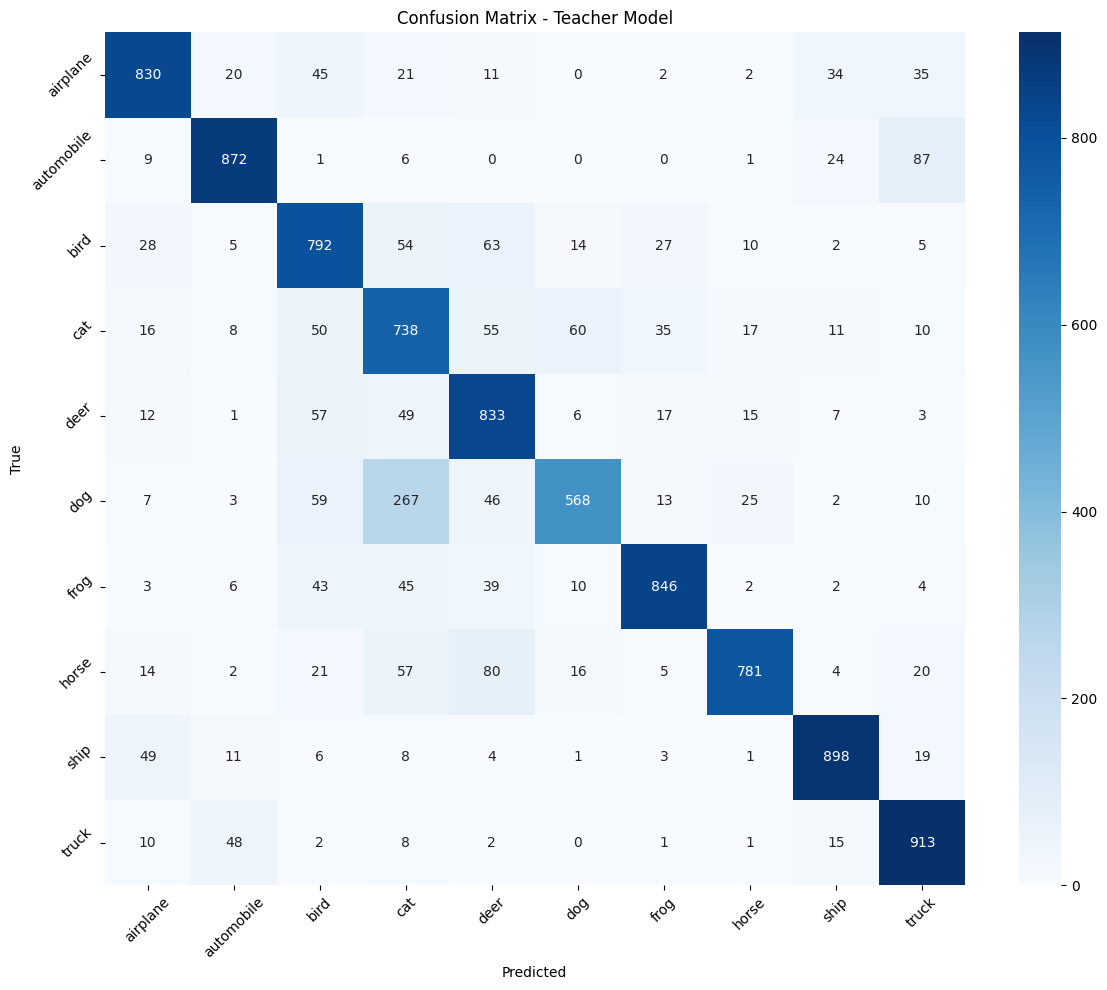

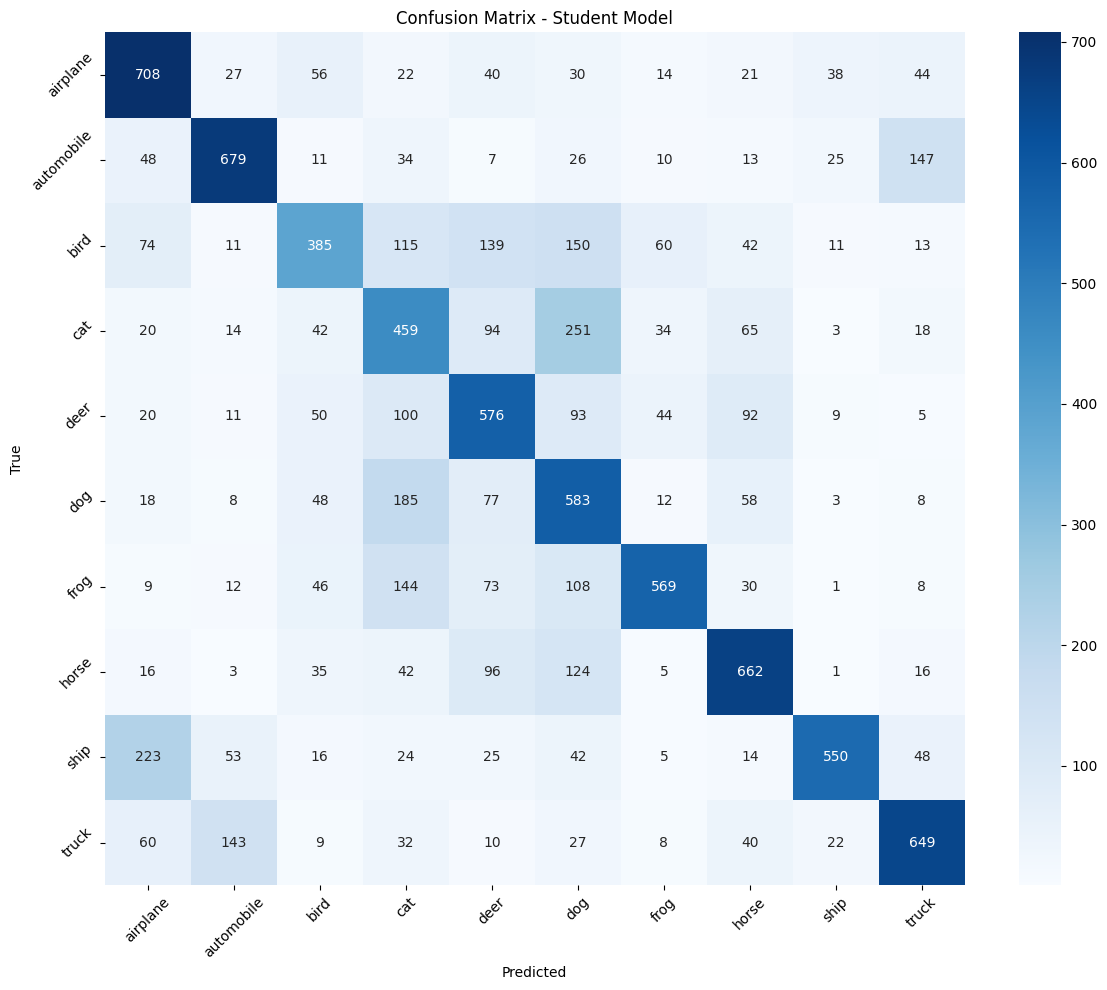

In [7]:
import torch
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

class ModelEvaluator:
    def __init__(self, teacher_model, student_model, test_loader, device):
        self.teacher_model = teacher_model
        self.student_model = student_model
        self.test_loader = test_loader
        self.device = device
        self.class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
                           'dog', 'frog', 'horse', 'ship', 'truck']

    def evaluate_model(self, model, model_name):
        model.eval()
        all_predictions = []
        all_targets = []
        test_loss = 0
        correct = 0
        total = 0
        criterion = torch.nn.CrossEntropyLoss()

        with torch.no_grad():
            for inputs, targets in tqdm(self.test_loader, desc=f"Evaluating {model_name}"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                
                test_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                all_predictions.extend(predicted.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        avg_loss = test_loss / len(self.test_loader.dataset)
        
        return {
            'predictions': all_predictions,
            'targets': all_targets,
            'accuracy': accuracy,
            'loss': avg_loss
        }

    def plot_confusion_matrix(self, true_labels, predictions, model_name):
        cm = confusion_matrix(true_labels, predictions)
        plt.figure(figsize=(12, 10))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=self.class_names,
                    yticklabels=self.class_names)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(rotation=45)
        plt.yticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def evaluate_and_compare(self):
        # Evaluate both models
        teacher_results = self.evaluate_model(self.teacher_model, "Teacher")
        student_results = self.evaluate_model(self.student_model, "Student")

        # Print classification reports
        print("\nTeacher Model Classification Report:")
        print(classification_report(teacher_results['targets'], 
                                 teacher_results['predictions'],
                                 target_names=self.class_names))
        
        print("\nStudent Model Classification Report:")
        print(classification_report(student_results['targets'], 
                                 student_results['predictions'],
                                 target_names=self.class_names))

        # Print overall metrics
        print("\nOverall Metrics:")
        print(f"Teacher - Test Accuracy: {teacher_results['accuracy']:.2f}%, Test Loss: {teacher_results['loss']:.4f}")
        print(f"Student - Test Accuracy: {student_results['accuracy']:.2f}%, Test Loss: {student_results['loss']:.4f}")

        # Plot confusion matrices
        self.plot_confusion_matrix(teacher_results['targets'], 
                                 teacher_results['predictions'], 
                                 "Teacher Model")
        self.plot_confusion_matrix(student_results['targets'], 
                                 student_results['predictions'], 
                                 "Student Model")

def main():
    # Initialize your models and data
    model_trainer = ModelTrainer()
    data_manager = DataManager()
    dataloaders = data_manager.load_data()
    
    # Create models
    teacher_model, student_model = model_trainer.create_models()
    
    # Load saved model weights
    teacher_model.load_state_dict(torch.load('teacher_model_strat2.pth'))
    student_model.load_state_dict(torch.load('student_model_strat2.pth'))
    
    # Set models to evaluation mode
    teacher_model.eval()
    student_model.eval()
    
    # Create evaluator and run evaluation
    evaluator = ModelEvaluator(
        teacher_model=teacher_model,
        student_model=student_model,
        test_loader=dataloaders['test'],
        device=model_trainer.device
    )
    
    evaluator.evaluate_and_compare()

if __name__ == "__main__":
    main()

The results reveal a significant gap between the pretrained teacher and the non-trained student on the CIFAR-10 dataset. The teacher achieves a strong test accuracy of 80.71% with a relatively low test loss of 0.8700, demonstrating effective feature extraction and classification due to its pretrained ResNet50 architecture. In contrast, the student model, which starts without pretraining, struggles with a test accuracy of only 58.20% and a much higher test loss of 1.9559.

This highlights the importance of pretraining for leveraging rich feature representations and suggests that the student has a long way to match the teacher's performance. The large discrepancy emphasizes the challenge of transferring knowledge from a highly trained teacher to an untrained student, especially when the student lacks prior exposure to relevant feature hierarchies.

### KNOWLEDGE DISTILLATION ON NON PRETRAINED STUDENT


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
from torchvision import transforms, datasets, models
from tqdm import tqdm
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from torch.cuda.amp import autocast, GradScaler
import logging
import os

# Configure Logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class Config:
    BATCH_SIZE = 128
    NUM_EPOCHS = 10
    LEARNING_RATE = 1e-3
    ALPHA = 0.15  # Weight for KD loss
    TEMPERATURE = 2.0  # Temperature for softening probabilities
    NUM_WORKERS = 4
    PIN_MEMORY = True
    MIXED_PRECISION = True
    TRAIN_SPLIT = 0.6
    VAL_SPLIT = 0.2
    TEST_SPLIT = 0.2

class DistillationTrainer:
    def __init__(self, train_loader, val_loader, test_loader, device):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device
        self.teacher_model = self.load_teacher_model("teacher_model_strat2.pth")
        self.student_model = self.load_student_model()
        self.optimizer = optim.Adam(self.student_model.parameters(), lr=Config.LEARNING_RATE)
        self.scaler = GradScaler(enabled=Config.MIXED_PRECISION)

    def load_teacher_model(self, model_file):
        model = models.resnet50(pretrained=True)
        model.fc = nn.Linear(2048, 10)
        model.load_state_dict(torch.load(model_file, map_location=self.device))
        model.eval()
        model.to(self.device)
        logging.info(f"Successfully loaded teacher model from {model_file}")
        return model

    def load_student_model(self):
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(512, 10)
        model.to(self.device)
        logging.info("Loaded student model with ImageNet pretrained weights.")
        return model

    def get_teacher_probs(self, inputs):
        with torch.no_grad():
            teacher_logits = self.teacher_model(inputs)
            teacher_probs = F.softmax(teacher_logits / Config.TEMPERATURE, dim=1)
        return teacher_probs

    def train(self):
        logging.info("Starting knowledge distillation training...")
        criterion_ce = nn.CrossEntropyLoss()
        criterion_kd = nn.KLDivLoss(reduction="batchmean")

        for epoch in range(Config.NUM_EPOCHS):
            self.student_model.train()
            running_loss = 0.0
            for inputs, targets in tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{Config.NUM_EPOCHS}"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                # Teacher predictions (probabilities)
                teacher_probs = self.get_teacher_probs(inputs)
                
                with autocast(enabled=Config.MIXED_PRECISION):
                    # Student outputs
                    student_logits = self.student_model(inputs)
                    student_probs = F.log_softmax(student_logits / Config.TEMPERATURE, dim=1)
                    
                    # Compute losses
                    loss_ce = criterion_ce(student_logits, targets)
                    loss_kd = criterion_kd(student_probs, teacher_probs) * (Config.TEMPERATURE ** 2)
                    loss = (1 - Config.ALPHA) * loss_ce + Config.ALPHA * loss_kd

                # Backward and optimization
                self.scaler.scale(loss).backward()
                self.scaler.step(self.optimizer)
                self.scaler.update()
                self.optimizer.zero_grad()
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(self.train_loader.dataset)
            logging.info(f"Epoch [{epoch+1}/{Config.NUM_EPOCHS}] - Loss: {epoch_loss:.4f}")
            self.validate()

    def validate(self):
        self.student_model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for inputs, targets in tqdm(self.val_loader, desc="Validating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        logging.info(f"Validation Accuracy: {accuracy:.2f}%")

    def evaluate(self):
        self.student_model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        with torch.no_grad():
            for inputs, targets in tqdm(self.test_loader, desc="Evaluating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        logging.info(f"Test Accuracy: {accuracy:.2f}%")
        print("Classification Report:")
        print(classification_report(all_targets, all_preds, target_names=self.get_class_names()))
        return accuracy

    def get_class_names(self):
        return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


def main():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
    torch.cuda.empty_cache()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    full_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(Config.TRAIN_SPLIT * len(full_dataset))
    val_size = int(Config.VAL_SPLIT * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

    train_loader = DataLoader(train_dataset, batch_size=Config.BATCH_SIZE, shuffle=True,
                              num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                            num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    test_loader = DataLoader(test_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                             num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    trainer = DistillationTrainer(train_loader, val_loader, test_loader, device)
    trainer.train()
    trainer.evaluate()

if __name__ == "__main__":
    main()


Files already downloaded and verified


c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_43764\1093825144.py:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which wil

Classification Report:
              precision    recall  f1-score   support

    airplane       0.76      0.78      0.77       973
  automobile       0.89      0.80      0.85      1010
        bird       0.74      0.60      0.67      1006
         cat       0.45      0.70      0.55       967
        deer       0.69      0.73      0.71       963
         dog       0.86      0.37      0.52      1024
        frog       0.72      0.85      0.78      1025
       horse       0.76      0.80      0.78      1035
        ship       0.81      0.87      0.84       998
       truck       0.83      0.77      0.80       999

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.73     10000
weighted avg       0.75      0.73      0.73     10000



### KNOWLEDGE DISTILLATION ON NON PRETRAINED STUDENT (SCORES AND FEATURE MAP EXTRACTION)

In [9]:
class Config:
    BATCH_SIZE = 128
    NUM_EPOCHS = 10
    LEARNING_RATE = 1e-3
    ALPHA = 0.15  # Weight for logit KD loss
    BETA = 0.25   # Weight for feature KD loss
    TEMPERATURE = 2.0
    NUM_WORKERS = 4
    PIN_MEMORY = True
    MIXED_PRECISION = True
    TRAIN_SPLIT = 0.6
    VAL_SPLIT = 0.2
    TEST_SPLIT = 0.2

class FeatureHook:
    """Hook to capture intermediate feature maps"""
    def __init__(self):
        self.features = None
        
    def __call__(self, module, input, output):
        self.features = output

class ResNetWithHooks(nn.Module):
    """Wrapper for ResNet models to capture intermediate features"""
    def __init__(self, model):
        super().__init__()
        self.model = model
        self.features = {}
        
        # Register hooks to capture layer outputs
        self.hooks = [
            self.model.layer1[-1].register_forward_hook(self._get_hook('layer1')),
            self.model.layer2[-1].register_forward_hook(self._get_hook('layer2')),
            self.model.layer3[-1].register_forward_hook(self._get_hook('layer3')),
            self.model.layer4[-1].register_forward_hook(self._get_hook('layer4'))
        ]
        
    def _get_hook(self, layer_name):
        def hook(module, input, output):
            self.features[layer_name] = output
        return hook
        
    def forward(self, x):
        return self.model(x)

class FeatureAdaptor(nn.Module):
    """Adapts student features to match teacher feature dimensions"""
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.adaptor = nn.Conv2d(in_channels, out_channels, 1)
        
    def forward(self, x):
        return self.adaptor(x)

class DistillationTrainer:
    def __init__(self, train_loader, val_loader, test_loader, device):
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.test_loader = test_loader
        self.device = device
        
        # Initialize models with hooks
        self.teacher_model = self._init_teacher_model("teacher_model_strat2.pth")
        self.student_model = self._init_student_model()
        
        # Freeze teacher parameters
        for param in self.teacher_model.parameters():
            param.requires_grad = False
            
        # Initialize feature adaptors
        self.feature_adaptors = self._init_feature_adaptors()
        
        # Combined parameters for optimization
        params = list(self.student_model.parameters()) + \
                [p for adaptor in self.feature_adaptors.values() for p in adaptor.parameters()]
        
        self.optimizer = optim.Adam(params, lr=Config.LEARNING_RATE)
        self.scaler = GradScaler(enabled=Config.MIXED_PRECISION)

    def _init_teacher_model(self, model_file):
        base_model = models.resnet50(pretrained=True)
        base_model.fc = nn.Linear(2048, 10)
        base_model.load_state_dict(torch.load(model_file, map_location=self.device))
        model = ResNetWithHooks(base_model)
        model.eval()
        model.to(self.device)
        logging.info(f"Loaded teacher model from {model_file}")
        return model

    def _init_student_model(self):
        base_model = models.resnet18(pretrained=False)
        base_model.fc = nn.Linear(512, 10)
        model = ResNetWithHooks(base_model)
        model.to(self.device)
        logging.info("Loaded student model with ImageNet pretrained weights")
        return model

    def _init_feature_adaptors(self):
        # Channel sizes for ResNet18 -> ResNet50 adaptation
        adaptors = nn.ModuleDict({
            'layer1': FeatureAdaptor(64, 256),
            'layer2': FeatureAdaptor(128, 512),
            'layer3': FeatureAdaptor(256, 1024),
            'layer4': FeatureAdaptor(512, 2048)
        })
        adaptors.to(self.device)
        return adaptors

    def feature_loss(self, student_features, teacher_features):
        loss = 0
        for layer_name in student_features:
            adapted_student = self.feature_adaptors[layer_name](student_features[layer_name])
            # Normalize features
            s_norm = F.normalize(adapted_student.view(adapted_student.size(0), -1), dim=1)
            t_norm = F.normalize(teacher_features[layer_name].view(teacher_features[layer_name].size(0), -1), dim=1)
            # Compute MSE loss between normalized features
            loss += F.mse_loss(s_norm, t_norm)
        return loss / len(student_features)

    def train(self):
        logging.info("Starting enhanced knowledge distillation training...")
        criterion_ce = nn.CrossEntropyLoss()
        criterion_kd = nn.KLDivLoss(reduction="batchmean")

        for epoch in range(Config.NUM_EPOCHS):
            self.student_model.train()
            running_loss = 0.0
            
            for inputs, targets in tqdm(self.train_loader, desc=f"Epoch {epoch+1}/{Config.NUM_EPOCHS}"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)

                with torch.no_grad():
                    # Get teacher outputs and features
                    teacher_logits = self.teacher_model(inputs)
                    teacher_probs = F.softmax(teacher_logits / Config.TEMPERATURE, dim=1)
                    teacher_features = self.teacher_model.features.copy()

                with autocast(enabled=Config.MIXED_PRECISION):
                    # Get student outputs and features
                    student_logits = self.student_model(inputs)
                    student_probs = F.log_softmax(student_logits / Config.TEMPERATURE, dim=1)
                    student_features = self.student_model.features
                    
                    # Calculate losses
                    loss_ce = criterion_ce(student_logits, targets)
                    loss_kd = criterion_kd(student_probs, teacher_probs) * (Config.TEMPERATURE ** 2)
                    loss_feat = self.feature_loss(student_features, teacher_features)
                    
                    # Combine losses
                    loss = (1 - Config.ALPHA - Config.BETA) * loss_ce + \
                           Config.ALPHA * loss_kd + \
                           Config.BETA * loss_feat

                # Backward and optimization
                self.optimizer.zero_grad()
                self.scaler.scale(loss).backward()
                self.scaler.step(self.optimizer)
                self.scaler.update()
                
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / len(self.train_loader.dataset)
            logging.info(f"Epoch [{epoch+1}/{Config.NUM_EPOCHS}] - Loss: {epoch_loss:.4f}")
            self.validate()


    def validate(self):
        self.student_model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in tqdm(self.val_loader, desc="Validating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)

        accuracy = 100. * correct / total
        logging.info(f"Validation Accuracy: {accuracy:.2f}%")

    def evaluate(self):
        self.student_model.eval()
        correct = 0
        total = 0
        all_preds = []
        all_targets = []
        
        with torch.no_grad():
            for inputs, targets in tqdm(self.test_loader, desc="Evaluating"):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.student_model(inputs)
                _, preds = outputs.max(1)
                correct += preds.eq(targets).sum().item()
                total += targets.size(0)
                all_preds.extend(preds.cpu().numpy())
                all_targets.extend(targets.cpu().numpy())

        accuracy = 100. * correct / total
        logging.info(f"Test Accuracy: {accuracy:.2f}%")
        print("Classification Report:")
        print(classification_report(all_targets, all_preds, 
              target_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))
        return accuracy

# Main function remains the same
def main():
    os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
    torch.cuda.empty_cache()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

    full_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    train_size = int(Config.TRAIN_SPLIT * len(full_dataset))
    val_size = int(Config.VAL_SPLIT * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size

    train_dataset, val_dataset, test_dataset = random_split(
        full_dataset, [train_size, val_size, test_size], generator=torch.Generator().manual_seed(42))

    train_loader = DataLoader(train_dataset, batch_size=Config.BATCH_SIZE, shuffle=True,
                              num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    val_loader = DataLoader(val_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                            num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    test_loader = DataLoader(test_dataset, batch_size=Config.BATCH_SIZE, shuffle=False,
                             num_workers=Config.NUM_WORKERS, pin_memory=Config.PIN_MEMORY)

    trainer = DistillationTrainer(train_loader, val_loader, test_loader, device)
    trainer.train()
    trainer.evaluate()

if __name__ == "__main__":
    main()

Files already downloaded and verified


c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\utilisateur\Desktop\Cours\aide a la decision\distilation\venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\utilisateur\AppData\Local\Temp\ipykernel_43764\1907582650.py:83: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which wil

Classification Report:
              precision    recall  f1-score   support

    airplane       0.71      0.77      0.74       973
  automobile       0.80      0.84      0.82      1010
        bird       0.78      0.59      0.67      1006
         cat       0.42      0.73      0.54       967
        deer       0.70      0.71      0.71       963
         dog       0.82      0.38      0.52      1024
        frog       0.85      0.73      0.78      1025
       horse       0.82      0.73      0.77      1035
        ship       0.72      0.91      0.80       998
       truck       0.80      0.75      0.77       999

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.71     10000
weighted avg       0.74      0.71      0.71     10000



With score distillation alone, the student model achieved a test accuracy of 72.77%, outperforming the result obtained with feature map (FM) and score distillation combined (71.33%). This suggests that score distillation, which focuses on aligning the student’s output scores with the teacher’s, is particularly effective in transferring knowledge for this task. The slightly lower performance of FM and score distillation combined may indicate that integrating feature map alignment introduces additional complexity or noise that slightly hinders the optimization process. Nonetheless, both approaches demonstrate significant improvements over the student’s baseline accuracy (58.20%) and highlight the effectiveness of knowledge distillation.

![alt text](output(9).png)

# Costum CNN 

In [10]:
# Deeper neural network class to be used as teacher:
class TeacherCostumModel(nn.Module):
    def __init__(self, num_classes=10):
        super(TeacherCostumModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Lightweight neural network class to be used as student:
class StudentCostumModel(nn.Module):
    def __init__(self, num_classes=10):
        super(StudentCostumModel, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

Training of the custom models 

Files already downloaded and verified
Files already downloaded and verified


Epochs Progress:  10%|█         | 1/10 [00:13<02:03, 13.67s/it]

Epoch 1: Teacher Train F1: 0.2314, Val F1: 0.3151, Train Loss: 2.0957, Val Loss: 1.8912
Epoch 1: Student Train F1: 0.1673, Val F1: 0.2678, Train Loss: 2.1656, Val Loss: 1.9752


Epochs Progress:  20%|██        | 2/10 [00:26<01:47, 13.42s/it]

Epoch 2: Teacher Train F1: 0.3515, Val F1: 0.3748, Train Loss: 1.7798, Val Loss: 1.6705
Epoch 2: Student Train F1: 0.3279, Val F1: 0.3857, Train Loss: 1.8593, Val Loss: 1.7420


Epochs Progress:  30%|███       | 3/10 [00:40<01:33, 13.36s/it]

Epoch 3: Teacher Train F1: 0.4307, Val F1: 0.4501, Train Loss: 1.5833, Val Loss: 1.4995
Epoch 3: Student Train F1: 0.4091, Val F1: 0.4205, Train Loss: 1.6653, Val Loss: 1.5884


Epochs Progress:  40%|████      | 4/10 [00:53<01:20, 13.35s/it]

Epoch 4: Teacher Train F1: 0.4772, Val F1: 0.4881, Train Loss: 1.4380, Val Loss: 1.4215
Epoch 4: Student Train F1: 0.4427, Val F1: 0.4606, Train Loss: 1.5538, Val Loss: 1.5095


Epochs Progress:  50%|█████     | 5/10 [01:06<01:06, 13.34s/it]

Epoch 5: Teacher Train F1: 0.5164, Val F1: 0.5168, Train Loss: 1.3523, Val Loss: 1.3155
Epoch 5: Student Train F1: 0.4694, Val F1: 0.4770, Train Loss: 1.4779, Val Loss: 1.4462


Epochs Progress:  60%|██████    | 6/10 [01:20<00:53, 13.31s/it]

Epoch 6: Teacher Train F1: 0.5479, Val F1: 0.5478, Train Loss: 1.2603, Val Loss: 1.2547
Epoch 6: Student Train F1: 0.4914, Val F1: 0.4944, Train Loss: 1.4199, Val Loss: 1.3981


Epochs Progress:  70%|███████   | 7/10 [01:33<00:39, 13.29s/it]

Epoch 7: Teacher Train F1: 0.5688, Val F1: 0.5670, Train Loss: 1.1976, Val Loss: 1.2176
Epoch 7: Student Train F1: 0.5102, Val F1: 0.5115, Train Loss: 1.3717, Val Loss: 1.3659


Epochs Progress:  80%|████████  | 8/10 [01:46<00:26, 13.30s/it]

Epoch 8: Teacher Train F1: 0.5937, Val F1: 0.5822, Train Loss: 1.1341, Val Loss: 1.1813
Epoch 8: Student Train F1: 0.5231, Val F1: 0.5264, Train Loss: 1.3327, Val Loss: 1.3306


Epochs Progress:  90%|█████████ | 9/10 [01:59<00:13, 13.30s/it]

Epoch 9: Teacher Train F1: 0.6202, Val F1: 0.6050, Train Loss: 1.0660, Val Loss: 1.1208
Epoch 9: Student Train F1: 0.5343, Val F1: 0.5342, Train Loss: 1.3053, Val Loss: 1.3062


Epochs Progress: 100%|██████████| 10/10 [02:13<00:00, 13.33s/it]

Epoch 10: Teacher Train F1: 0.6405, Val F1: 0.6150, Train Loss: 1.0101, Val Loss: 1.0990
Epoch 10: Student Train F1: 0.5452, Val F1: 0.5455, Train Loss: 1.2730, Val Loss: 1.2895


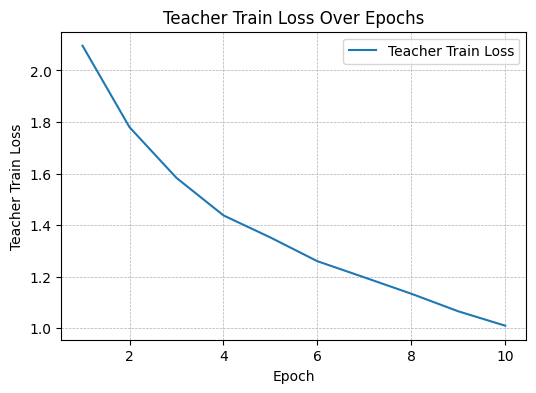

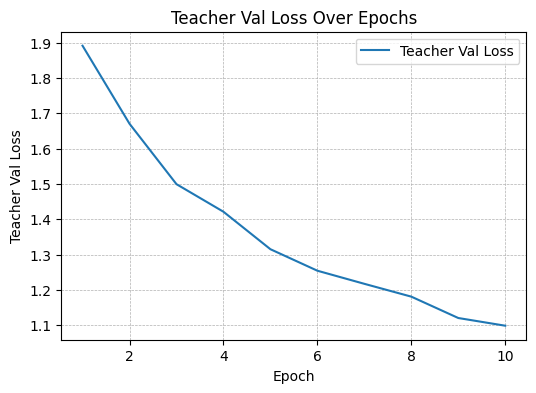

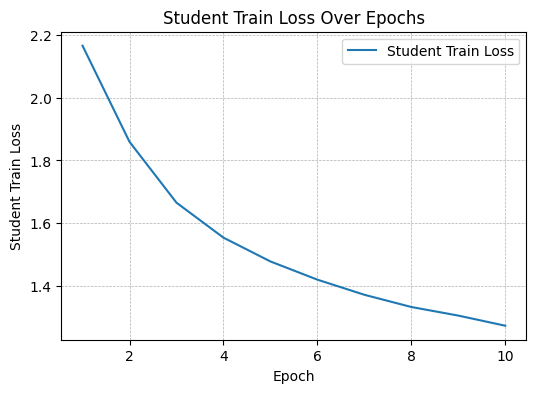

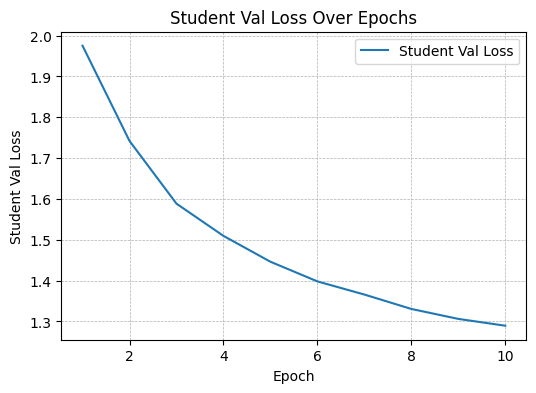

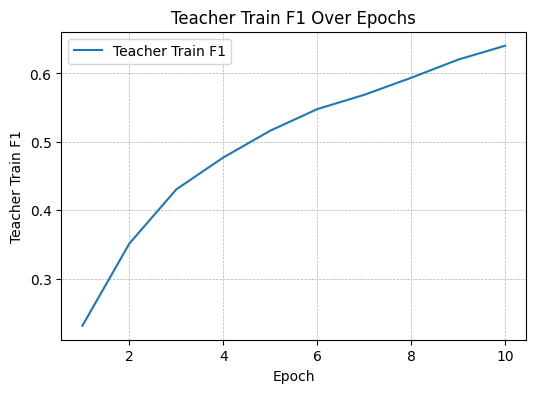

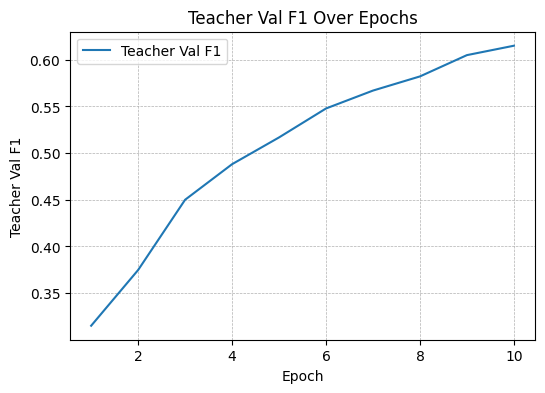

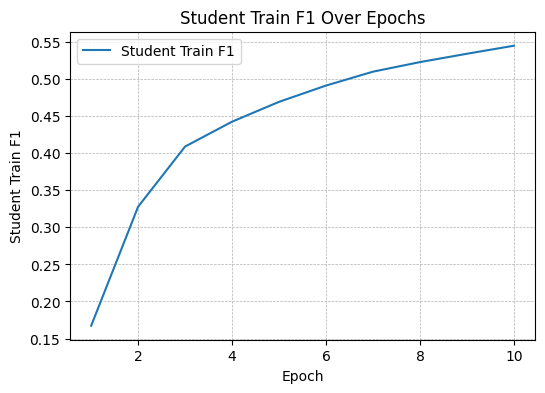

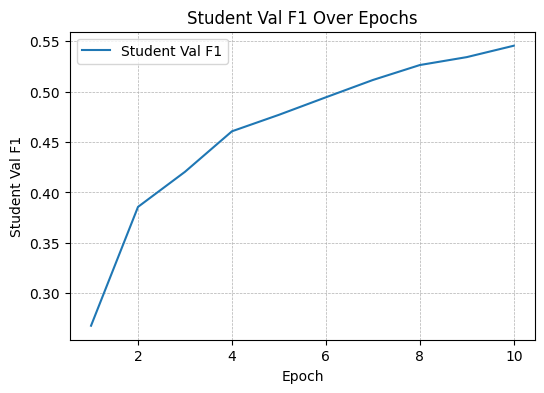

   Epoch  Teacher Train F1  Teacher Val F1  Student Train F1  Student Val F1  \
0      1          0.231410        0.315140          0.167252        0.267791   
1      2          0.351532        0.374824          0.327941        0.385655   
2      3          0.430701        0.450057          0.409127        0.420453   
3      4          0.477226        0.488143          0.442673        0.460646   
4      5          0.516428        0.516823          0.469441        0.476978   
5      6          0.547891        0.547824          0.491401        0.494367   
6      7          0.568802        0.566993          0.510175        0.511520   
7      8          0.593682        0.582159          0.523067        0.526363   
8      9          0.620217        0.604962          0.534350        0.534224   
9     10          0.640516        0.615034          0.545188        0.545520   

   Teacher Train Loss  Teacher Val Loss  Student Train Loss  Student Val Loss  
0            2.095750          1.891239

In [11]:


class ModelTrainer:
    def __init__(self, device='cuda'):
        self.device = torch.device('cuda' if torch.cuda.is_available() and device=='cuda' else 'cpu')
        self.configure_cuda()
        
    @staticmethod
    def configure_cuda():
        os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:4096"
        torch.cuda.empty_cache()

    def create_models(self):
        teacher_model = TeacherCostumModel()
        teacher_model.fc = nn.Linear(2048, 10)
        
        student_model = StudentCostumModel()
        student_model.fc = nn.Linear(512, 10)
        
        return teacher_model.to(self.device), student_model.to(self.device)

class DataManager:
    def __init__(self, batch_size=2048):
        self.batch_size = batch_size
        self.transform = self.get_transform()
        
    @staticmethod
    def get_transform():
        return transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    
    def load_data(self):
        train_full = datasets.CIFAR10(root='./data', train=True, download=True, transform=self.transform)
        test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=self.transform)
        
        total_train = len(train_full)
        train_size = int(0.60 * total_train)
        val_size = int(0.20 * total_train)
        test_size = total_train - train_size - val_size
        
        train_dataset, val_dataset, _ = random_split(train_full, [train_size, val_size, test_size])
        
        return {
            'train': DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True),
            'val': DataLoader(val_dataset, batch_size=self.batch_size, shuffle=False),
            'test': DataLoader(test_dataset, batch_size=self.batch_size, shuffle=False)
        }

class Trainer:
    def __init__(self, model, criterion, optimizer, device):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.device = device
        
    def train_epoch(self, train_loader):
        self.model.train()
        running_loss, correct, total = 0.0, 0, 0
        all_targets, all_predictions = [], []
        
        for inputs, targets in tqdm(train_loader, desc="Training", leave=False):
            inputs, targets = inputs.to(self.device), targets.to(self.device)
            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, targets)
            loss.backward()
            self.optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            
            all_targets.extend(targets.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            
        metrics = {
            'loss': running_loss / len(train_loader.dataset),
            'accuracy': 100. * correct / total,
            'f1': f1_score(all_targets, all_predictions, average='weighted')
        }
        
        return metrics
    
    def evaluate(self, val_loader):
        self.model.eval()
        val_loss, correct, total = 0.0, 0, 0
        all_targets, all_predictions = [], []
        
        with torch.no_grad():
            for inputs, targets in tqdm(val_loader, desc="Validating", leave=False):
                inputs, targets = inputs.to(self.device), targets.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, targets)
                
                val_loss += loss.item() * inputs.size(0)
                _, predicted = outputs.max(1)
                total += targets.size(0)
                correct += predicted.eq(targets).sum().item()
                
                all_targets.extend(targets.cpu().numpy())
                all_predictions.extend(predicted.cpu().numpy())
                
        metrics = {
            'loss': val_loss / len(val_loader.dataset),
            'accuracy': 100. * correct / total,
            'f1': f1_score(all_targets, all_predictions, average='weighted')
        }
        
        return metrics

class ResultVisualizer:
    @staticmethod
    def plot_metrics(results, metrics):
        for metric in metrics:
            plt.figure(figsize=(6, 4))
            plt.plot(results['Epoch'], results[metric], label=metric)
            plt.title(f'{metric} Over Epochs')
            plt.xlabel('Epoch')
            plt.ylabel(metric)
            plt.grid(True, linestyle='--', linewidth=0.5)
            plt.legend()
            plt.show()

def main():
    model_trainer = ModelTrainer()
    data_manager = DataManager()
    dataloaders = data_manager.load_data()
    teacher_model, student_model = model_trainer.create_models()
    
    criterion = nn.CrossEntropyLoss()
    optimizer_teacher = optim.Adam(teacher_model.parameters(), lr=0.001)
    optimizer_student = optim.Adam(student_model.parameters(), lr=0.001)
    
    teacher_trainer = Trainer(teacher_model, criterion, optimizer_teacher, model_trainer.device)
    student_trainer = Trainer(student_model, criterion, optimizer_student, model_trainer.device)
    
    num_epochs = 10
    results = {
        'Epoch': [], 'Teacher Train F1': [], 'Teacher Val F1': [],
        'Student Train F1': [], 'Student Val F1': [],
        'Teacher Train Loss': [], 'Teacher Val Loss': [],
        'Student Train Loss': [], 'Student Val Loss': []
    }
    
    for epoch in tqdm(range(1, num_epochs + 1), desc="Epochs Progress"):
        teacher_train_metrics = teacher_trainer.train_epoch(dataloaders['train'])
        teacher_val_metrics = teacher_trainer.evaluate(dataloaders['val'])
        student_train_metrics = student_trainer.train_epoch(dataloaders['train'])
        student_val_metrics = student_trainer.evaluate(dataloaders['val'])
        
        results['Epoch'].append(epoch)
        results['Teacher Train F1'].append(teacher_train_metrics['f1'])
        results['Teacher Val F1'].append(teacher_val_metrics['f1'])
        results['Student Train F1'].append(student_train_metrics['f1'])
        results['Student Val F1'].append(student_val_metrics['f1'])
        results['Teacher Train Loss'].append(teacher_train_metrics['loss'])
        results['Teacher Val Loss'].append(teacher_val_metrics['loss'])
        results['Student Train Loss'].append(student_train_metrics['loss'])
        results['Student Val Loss'].append(student_val_metrics['loss'])
        
        print(f"Epoch {epoch}: Teacher Train F1: {teacher_train_metrics['f1']:.4f}, Val F1: {teacher_val_metrics['f1']:.4f}, Train Loss: {teacher_train_metrics['loss']:.4f}, Val Loss: {teacher_val_metrics['loss']:.4f}")
        print(f"Epoch {epoch}: Student Train F1: {student_train_metrics['f1']:.4f}, Val F1: {student_val_metrics['f1']:.4f}, Train Loss: {student_train_metrics['loss']:.4f}, Val Loss: {student_val_metrics['loss']:.4f}")
    
    results_df = pd.DataFrame(results)
    metrics_to_plot = ['Teacher Train Loss', 'Teacher Val Loss', 'Student Train Loss', 'Student Val Loss', 'Teacher Train F1', 'Teacher Val F1', 'Student Train F1', 'Student Val F1']
    visualizer = ResultVisualizer()
    visualizer.plot_metrics(results_df, metrics_to_plot)
    print(results_df)

    torch.save(teacher_model.state_dict(), 'teacher_custom_model_strat1.pth')
    torch.save(student_model.state_dict(), 'student_custom_model_strat1.pth')

if __name__ == "__main__":
    main()


Evaluation of the trained Custom models

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# Check if GPU is available, and if not, use the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Below we are preprocessing data for CIFAR-10. We use an arbitrary batch size of 128.
transforms_cifar = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Loading the CIFAR-10 dataset:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms_cifar)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms_cifar)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
#Dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False, num_workers=2)

In [53]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += residual
        out = self.relu(out)
        return out

# Define SpatialAttention
class SpatialAttention(nn.Module):
    def __init__(self):
        super(SpatialAttention, self).__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3)
        
    def forward(self, x):
        avg_pool = torch.mean(x, dim=1, keepdim=True)
        max_pool, _ = torch.max(x, dim=1, keepdim=True)
        pool = torch.cat([avg_pool, max_pool], dim=1)
        attention = torch.sigmoid(self.conv(pool))
        return x * attention

In [60]:
class DepthwiseSeparableConv(nn.Module):
    def __init__(self, nin, nout):
        super(DepthwiseSeparableConv, self).__init__()
        self.depthwise = nn.Conv2d(nin, nin, kernel_size=3, padding=1, groups=nin)
        self.pointwise = nn.Conv2d(nin, nout, kernel_size=1)

    def forward(self, x):
        out = self.depthwise(x)
        out = self.pointwise(out)
        return out

In [109]:
import torch
import torch.nn as nn

class Teacher_Costum_Model(nn.Module):
    def __init__(self, num_classes=10):
        super(Teacher_Costum_Model, self).__init__()
        
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Residual block
            ResidualBlock(64, 64),
            
            # Third conv block
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Spatial attention
            SpatialAttention()
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

class Student_Costum_Model(nn.Module):
    def __init__(self, num_classes=10):
        super(Student_Costum_Model, self).__init__()
        
        class SimplifiedAttention(nn.Module):
            def __init__(self):
                super(SimplifiedAttention, self).__init__()
                self.conv = nn.Conv2d(2, 1, kernel_size=3, padding=1)
            
            def forward(self, x):
                avg_pool = torch.mean(x, dim=1, keepdim=True)
                max_pool, _ = torch.max(x, dim=1, keepdim=True)
                pool = torch.cat([avg_pool, max_pool], dim=1)
                attention = torch.sigmoid(self.conv(pool))
                return x * attention
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            SimplifiedAttention()
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.15),
            nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [110]:
def train(model, train_loader, epochs, learning_rate, device):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    model.train()

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            # inputs: A collection of batch_size images
            # labels: A vector of dimensionality batch_size with integers denoting class of each image
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            # outputs: Output of the network for the collection of images. A tensor of dimensionality batch_size x num_classes
            # labels: The actual labels of the images. Vector of dimensionality batch_size
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader)}")

def test(model, test_loader, device):
    model.to(device)
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [111]:
torch.manual_seed(42)
nn_deep = Teacher_Costum_Model(num_classes=10).to(device)
train(nn_deep, train_loader, epochs=10, learning_rate=0.001, device=device)
test_accuracy_deep = test(nn_deep, test_loader, device)

# Instantiate the lightweight network:
torch.manual_seed(42)
nn_light = Student_Costum_Model(num_classes=10).to(device)

Epoch 1/10, Loss: 1.1802284903538502
Epoch 2/10, Loss: 0.7819958030415313
Epoch 3/10, Loss: 0.6685359665499929
Epoch 4/10, Loss: 0.5771078276817146
Epoch 5/10, Loss: 0.5174041731125864
Epoch 6/10, Loss: 0.45919223144993454
Epoch 7/10, Loss: 0.4160407164212688
Epoch 8/10, Loss: 0.374212784268667
Epoch 9/10, Loss: 0.33242622532350635
Epoch 10/10, Loss: 0.2975511510887414
Test Accuracy: 80.95%


In [112]:
torch.manual_seed(42)
new_nn_light = Student_Costum_Model(num_classes=10).to(device)

In [113]:
total_params_deep = "{:,}".format(sum(p.numel() for p in nn_deep.parameters()))
print(f"DeepNN parameters: {total_params_deep}")
total_params_light = "{:,}".format(sum(p.numel() for p in nn_light.parameters()))
print(f"LightNN parameters: {total_params_light}")

DeepNN parameters: 1,355,021
LightNN parameters: 268,333


In [114]:
train(nn_light, train_loader, epochs=10, learning_rate=0.001, device=device)
test_accuracy_light_ce = test(nn_light, test_loader, device)

Epoch 1/10, Loss: 1.2586049600635343
Epoch 2/10, Loss: 0.9985695595631514
Epoch 3/10, Loss: 0.9171280374612345
Epoch 4/10, Loss: 0.8585745019985892
Epoch 5/10, Loss: 0.8116220703820134
Epoch 6/10, Loss: 0.7792828000719895
Epoch 7/10, Loss: 0.7364786377038492
Epoch 8/10, Loss: 0.701951601316252
Epoch 9/10, Loss: 0.6711419920634736
Epoch 10/10, Loss: 0.6407105947089622
Test Accuracy: 70.68%


In [115]:
print(f"Teacher accuracy: {test_accuracy_deep:.2f}%")
print(f"Student accuracy: {test_accuracy_light_ce:.2f}%")

Teacher accuracy: 80.95%
Student accuracy: 70.68%


In [116]:
def train_knowledge_distillation(teacher, student, train_loader, epochs, learning_rate, T, soft_target_loss_weight, ce_loss_weight, device):
    """
    Knowledge distillation training function adapted to match original signature with improvements
    
    Args:
        teacher: Teacher model
        student: Student model to train
        train_loader: DataLoader for training data
        epochs: Number of training epochs
        learning_rate: Learning rate
        T: Temperature for softening probabilities
        soft_target_loss_weight: Weight for soft targets loss
        ce_loss_weight: Weight for cross entropy loss
        device: Device to use for training
    """
    from tqdm import tqdm
    from torch.cuda.amp import GradScaler, autocast
    
    # Initialize components
    ce_loss = nn.CrossEntropyLoss()
    scaler = GradScaler()  # For mixed precision training
    optimizer = optim.Adam(student.parameters(), lr=learning_rate)
    
    # Set models to appropriate modes
    teacher.eval()
    student.train()
    
    # Training loop
    for epoch in range(epochs):
        running_loss = 0.0
        # Using tqdm for progress bar
        for inputs, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{epochs}'):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            
            # Forward pass with teacher model
            with torch.no_grad():
                teacher_logits = teacher(inputs)
                soft_targets = nn.functional.softmax(teacher_logits / T, dim=-1)
            
            # Mixed precision training
            with autocast():
                # Forward pass with student
                student_logits = student(inputs)
                soft_prob = nn.functional.log_softmax(student_logits / T, dim=-1)
                
                # Calculate soft targets loss
                soft_targets_loss = nn.functional.kl_div(
                    soft_prob,
                    soft_targets,
                    reduction='batchmean'
                ) * (T**2)
                
                # Calculate true label loss
                label_loss = ce_loss(student_logits, labels)
                
                # Combined loss with weights
                loss = soft_target_loss_weight * soft_targets_loss + ce_loss_weight * label_loss
            
            # Backward pass with gradient scaling
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += loss.item()
        
        # Calculate and print epoch loss
        epoch_loss = running_loss / len(train_loader)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    
    return student

def test(model, test_loader, device):
    """
    Test function to evaluate model accuracy
    
    Args:
        model: Model to evaluate
        test_loader: DataLoader for test data
        device: Device to use for evaluation
    
    Returns:
        float: Accuracy percentage
    """
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in tqdm(test_loader, desc='Testing'):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')
    return accuracy

# Apply ``train_knowledge_distillation`` with a temperature of 2. Arbitrarily set the weights to 0.75 for CE and 0.25 for distillation loss.
train_knowledge_distillation(teacher=nn_deep, student=new_nn_light, train_loader=train_loader, epochs=10, learning_rate=0.001, T=2, soft_target_loss_weight=0.25, ce_loss_weight=0.75, device=device)
test_accuracy_light_ce_and_kd = test(new_nn_light, test_loader, device)

# Compare the student test accuracy with and without the teacher, after distillation
print(f"Teacher accuracy: {test_accuracy_deep:.2f}%")
print(f"Student accuracy without teacher: {test_accuracy_light_ce:.2f}%")
print(f"Student accuracy with CE + KD: {test_accuracy_light_ce_and_kd:.2f}%")

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_43764\825798621.py:21: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()  # For mixed precision training
Epoch 1/10:   0%|          | 0/391 [00:00<?, ?it/s]C:\Users\utilisateur\AppData\Local\Temp\ipykernel_43764\825798621.py:42: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1/10: 100%|██████████| 391/391 [00:10<00:00, 38.70it/s]


Epoch 1/10, Loss: 1.6401


Epoch 2/10: 100%|██████████| 391/391 [00:10<00:00, 37.84it/s]


Epoch 2/10, Loss: 1.2413


Epoch 3/10: 100%|██████████| 391/391 [00:09<00:00, 39.22it/s] 


Epoch 3/10, Loss: 1.1244


Epoch 4/10: 100%|██████████| 391/391 [00:09<00:00, 39.34it/s]


Epoch 4/10, Loss: 1.0393


Epoch 5/10: 100%|██████████| 391/391 [00:09<00:00, 39.90it/s] 


Epoch 5/10, Loss: 0.9738


Epoch 6/10: 100%|██████████| 391/391 [00:09<00:00, 40.27it/s] 


Epoch 6/10, Loss: 0.9183


Epoch 7/10: 100%|██████████| 391/391 [00:09<00:00, 39.83it/s] 


Epoch 7/10, Loss: 0.8658


Epoch 8/10: 100%|██████████| 391/391 [00:09<00:00, 39.51it/s] 


Epoch 8/10, Loss: 0.8273


Epoch 9/10: 100%|██████████| 391/391 [00:09<00:00, 40.18it/s] 


Epoch 9/10, Loss: 0.7862


Epoch 10/10: 100%|██████████| 391/391 [00:09<00:00, 40.23it/s] 


Epoch 10/10, Loss: 0.7508


Testing: 100%|██████████| 79/79 [00:05<00:00, 14.23it/s]

Test Accuracy: 72.13%
Teacher accuracy: 80.95%
Student accuracy without teacher: 70.68%
Student accuracy with CE + KD: 72.13%


In [118]:
def test_multiple_outputs(model, test_loader, device):
    model.to(device)
    model.eval()

    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs, _ = model(inputs) # Disregard the second tensor of the tuple
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

In [178]:
class Teacher_Costum_ModelFm(nn.Module):
    def __init__(self, num_classes=10):
        super(Teacher_Costum_ModelFm, self).__init__()
        self.features = nn.Sequential(
            # First conv block
            nn.Conv2d(3, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            
            # Second conv block
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Residual block
            ResidualBlock(64, 64),
            
            # Third conv block
            nn.Conv2d(64, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Spatial attention
            SpatialAttention()
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.2),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.2),
            nn.Linear(256, num_classes)
        )
    def forward(self, x):
        x = self.features(x)
        conv_feature_map = x
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x, conv_feature_map

class Student_Costum_ModelFm(nn.Module):
    def __init__(self, num_classes=10):
        super(Student_Costum_ModelFm, self).__init__()
        class SimplifiedAttention(nn.Module):
            def __init__(self):
                super(SimplifiedAttention, self).__init__()
                self.conv = nn.Conv2d(2, 1, kernel_size=3, padding=1)
            
            def forward(self, x):
                avg_pool = torch.mean(x, dim=1, keepdim=True)
                max_pool, _ = torch.max(x, dim=1, keepdim=True)
                pool = torch.cat([avg_pool, max_pool], dim=1)
                attention = torch.sigmoid(self.conv(pool))
                return x * attention        
        self.features = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(16, 16, kernel_size=3, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            SimplifiedAttention()
        )
        # Include an extra regressor (in our case linear)
        self.regressor = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, padding=1)
        )
        self.classifier = nn.Sequential(
            nn.Linear(1024, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.15),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        regressor_output = self.regressor(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x, regressor_output

In [180]:
def train_mse_loss(teacher, student, train_loader, epochs, learning_rate, feature_map_weight, ce_loss_weight, device):
    ce_loss = nn.CrossEntropyLoss()
    mse_loss = nn.MSELoss()
    optimizer = optim.Adam(student.parameters(), lr=learning_rate)

    teacher.to(device)
    student.to(device)
    teacher.eval()  # Teacher set to evaluation mode
    student.train() # Student to train mode

    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            # Again ignore teacher logits
            with torch.no_grad():
                _, teacher_feature_map = teacher(inputs)

            # Forward pass with the student model
            student_logits, regressor_feature_map = student(inputs)

            # Calculate the loss
            hidden_rep_loss = mse_loss(regressor_feature_map, teacher_feature_map)

            # Calculate the true label loss
            label_loss = ce_loss(student_logits, labels)

            # Weighted sum of the two losses
            loss = feature_map_weight * hidden_rep_loss + ce_loss_weight * label_loss

            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader)}")

# Notice how our test function remains the same here with the one we used in our previous case. We only care about the actual outputs because we measure accuracy.

# Initialize a ModifiedLightNNRegressor
torch.manual_seed(42)
modified_nn_light_reg = Student_Costum_ModelFm(num_classes=10).to(device)

# We do not have to train the modified deep network from scratch of course, we just load its weights from the trained instance
modified_nn_deep_reg = Teacher_Costum_ModelFm(num_classes=10).to(device)
modified_nn_deep_reg.load_state_dict(nn_deep.state_dict())

# Train and test once again
train_mse_loss(teacher=modified_nn_deep_reg, student=modified_nn_light_reg, train_loader=train_loader, epochs=10, learning_rate=0.001, feature_map_weight=0.05, ce_loss_weight=0.95, device=device)
test_accuracy_light_ce_and_mse_loss = test_multiple_outputs(modified_nn_light_reg, test_loader, device)

Epoch 1/10, Loss: 1.205101865026957
Epoch 2/10, Loss: 0.9488724006716248
Epoch 3/10, Loss: 0.8668384506269489
Epoch 4/10, Loss: 0.8080270182141258
Epoch 5/10, Loss: 0.7694826034633705
Epoch 6/10, Loss: 0.7230279788641674
Epoch 7/10, Loss: 0.6903235987019356
Epoch 8/10, Loss: 0.6683856267148577
Epoch 9/10, Loss: 0.6393326746533289
Epoch 10/10, Loss: 0.6048475186843092
Test Accuracy: 71.33%


In [181]:
print(f"Teacher accuracy: {test_accuracy_deep:.2f}%")
print(f"Student accuracy without teacher: {test_accuracy_light_ce:.2f}%")
print(f"Student accuracy with CE + KD: {test_accuracy_light_ce_and_kd:.2f}%")
print(f"Student accuracy with CE + RegressorMSE: {test_accuracy_light_ce_and_mse_loss:.2f}%")

Teacher accuracy: 80.95%
Student accuracy without teacher: 70.68%
Student accuracy with CE + KD: 72.13%
Student accuracy with CE + RegressorMSE: 71.33%


The results indicate the following:

    Teacher Model: Achieves a strong test accuracy of 80.95%, showcasing its superior learning capacity and effectiveness in feature extraction.

    Student Model: Without any additional techniques, the student achieves a test accuracy of 70.68%, reflecting its baseline performance.

    Student with CE + KD (Knowledge Distillation): The test accuracy improves to 72.13%, indicating that incorporating the teacher's knowledge via KD helps enhance the student's performance.

    Student with CE + RegressorMSE: The test accuracy reaches 71.33%, showing a smaller improvement compared to KD, suggesting that regressor-based distillation is less effective for this setup.

Overall, CE + KD yields the best improvement in the student model's performance, effectively narrowing the gap between the student and the teacher, though a notable performance difference remains.

<img src="output(10).png" alt="Image" width="600" height="400">

Knowledge distillation, especially using score alignment, is a powerful technique for improving student model performance. While incorporating feature maps can enrich the process, it may require careful tuning to avoid adding unnecessary complexity. The results highlight the importance of choosing appropriate loss functions and distillation techniques tailored to the task and dataset for optimal knowledge transfer.